## Data analysis of the main automotive companies

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#Reading dataframe with all companies that answered the CPD questionnaire
data = pd.read_csv('CSV_files/Automotive_CDP.csv')
total_companies = data.shape[0]
print(total_companies)

62


In [11]:
data.head()

,Unnamed: 0,Title,Start Date,End Date,Currency,Reporting_boundary,Scope 1,Scope 2 (location based),Scope 2 (market based),Purchased goods and services,...,Upstream leased assets,Downstream transportation and distribution,Processing of sold products,Use of sold products,End of life treatment of sold products,Downstream leased assets,Franchises,Investments,Other (upstream),Other (downstream)
0,0,General Motors Company - Climate Change 2018,janvier 1 2017,d\xc3\xa9cembre 31 2017,USD,Operational control,1848804.0,4572734,4302887,46174073.0,...,10077.0,1609174.0,120731.0,220929108.0,3559479.0,20459.0,136449.0,59212.0,NaN,NaN
1,1,Mitsubishi Motors Corporation - Climate Change...,April 1 2019,March 31 2020,JPY,Financial control,116606.0,386402,416878,6330817.0,...,NaN,NaN,NaN,26833360.0,670649.0,NaN,13290.0,NaN,NaN,NaN
2,2,Fiat Chrysler Automobiles NV - Climate Change ...,January 1 2018,December 31 2018,EUR,Operational control,1129268.0,2795995,2470137,25496427.0,...,0.0,678238.0,NaN,85899110.0,931000.0,0.0,125535.0,NaN,NaN,NaN
3,3,BMW AG - Climate Change 2020,January 1 2019,December 31 2019,EUR,Operational control,642259.0,1420172,302574,18505921.0,...,NaN,NaN,NaN,53421006.0,1269018.0,NaN,NaN,NaN,NaN,NaN
4,4,Toyota Motor Corporation - Climate Change 2020,January 1 2019,December 31 2019,JPY,Financial control,1904119.0,4244743,3779542,65100000.0,...,NaN,10000.0,1240000.0,320500000.0,3960000.0,NaN,NaN,90000.0,NaN,NaN


## 1st analysis

For the automotive sector in general and for each company, the share of each scope of the company's total carbon footprint (as % of total emissions). 

A graphical output was used to illustrate the numerical values.

Also in this part of the analysis, it is necessary to count the number of no answers for each year (2018, 2019 and 2020).

In [12]:
#Pre-processing
#Removing '<Not Applicable>'. For calculation it is the same than zero.

emissions = data.transpose().iloc[6:]
emissions = emissions.replace('<Not Applicable>', np.nan)

In [13]:
#Computing mean of each sector 
i = 0
mean_emissions = np.zeros(len(emissions))
for s in np.array(emissions, dtype=float):
    s = s[np.logical_not(np.isnan(s))] #do not count companies with nan 
    mean_emissions[i] = np.mean(s)        
    i += 1

In [14]:
name = emissions.transpose().columns.values
name = name.tolist()

In [15]:
emissions_test = emissions.replace(np.nan, 0)
emissions_test = np.array(emissions_test, dtype=float)

In [16]:
sum_emissions = emissions_test.sum(axis=0)

#replace zero by inf to avoid divide by zero
sum_emissions = np.where(sum_emissions == 0, np.inf, sum_emissions)

In [17]:
#change to percentage all companies
percentage_emission = 100 * emissions_test.T / sum_emissions[:,None]
#percentage mean
percentage_mean = 100 * mean_emissions / mean_emissions.sum(axis=0)

In [18]:
df = pd.DataFrame(data=percentage_emission, columns=name)

df.loc['Mean'] = percentage_mean
df.insert(loc=0, column='Title', value=data.Title)

##Need to save this df as .csv
#This is the format I'll use for the following analysis
df.to_csv('CSV_files/First_Analysis_Footprint.csv')

In [19]:
##Give the title name
def statistics_company(df, title):
    
    name_emissions = df.columns.tolist()[1:]
    
    mean = df.loc["Mean"][1:].to_numpy(dtype='float')
    company_stat = df[df.Title == title].iloc[:,1:].to_numpy(dtype='float')[0]
   
    df = pd.DataFrame({'Mean of all companies': mean, title: company_stat}, index=name_emissions)

    #ax = df.plot.barh(figsize=(14,10))
    ax = df.plot(kind='barh', figsize=(16,10))
    fig = ax.get_figure()
    
    ax.set_xlabel('CO2eq (%)')
    ax.set_title('Emissions of ' + title + ' (%)')
    ax.invert_yaxis()
    ax.set_xlim(0,100)
    ax.legend()

    path = 'footprint_' + title + '.png'
    fig.savefig("intensity_images/" + path, bbox_inches='tight')

/home/cadulaschi/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


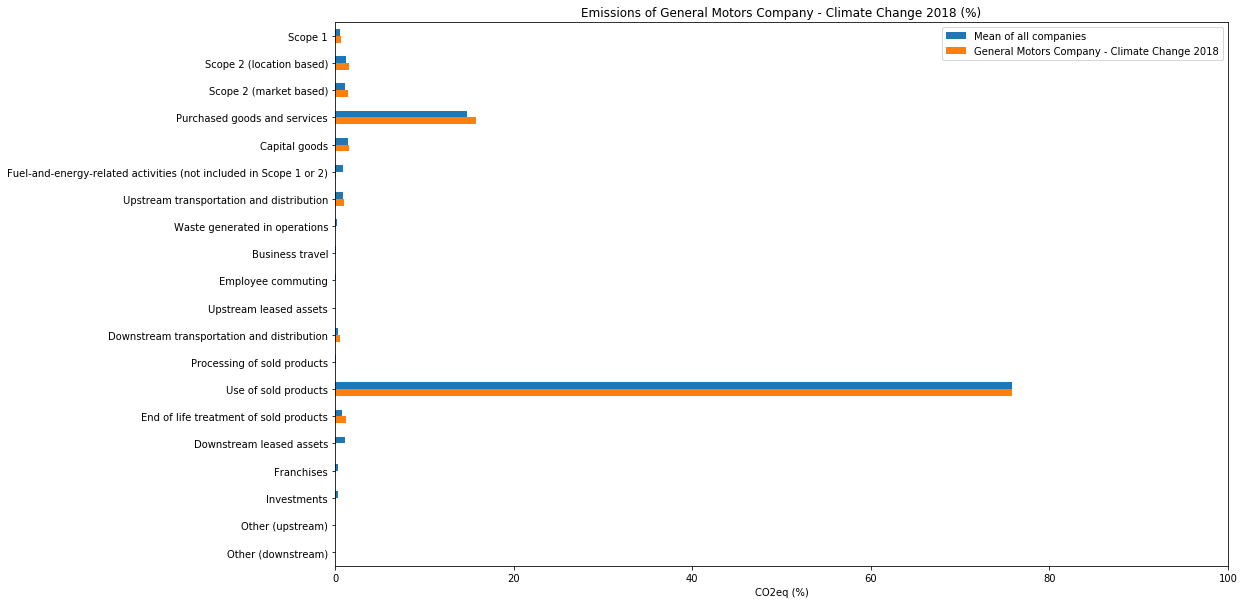

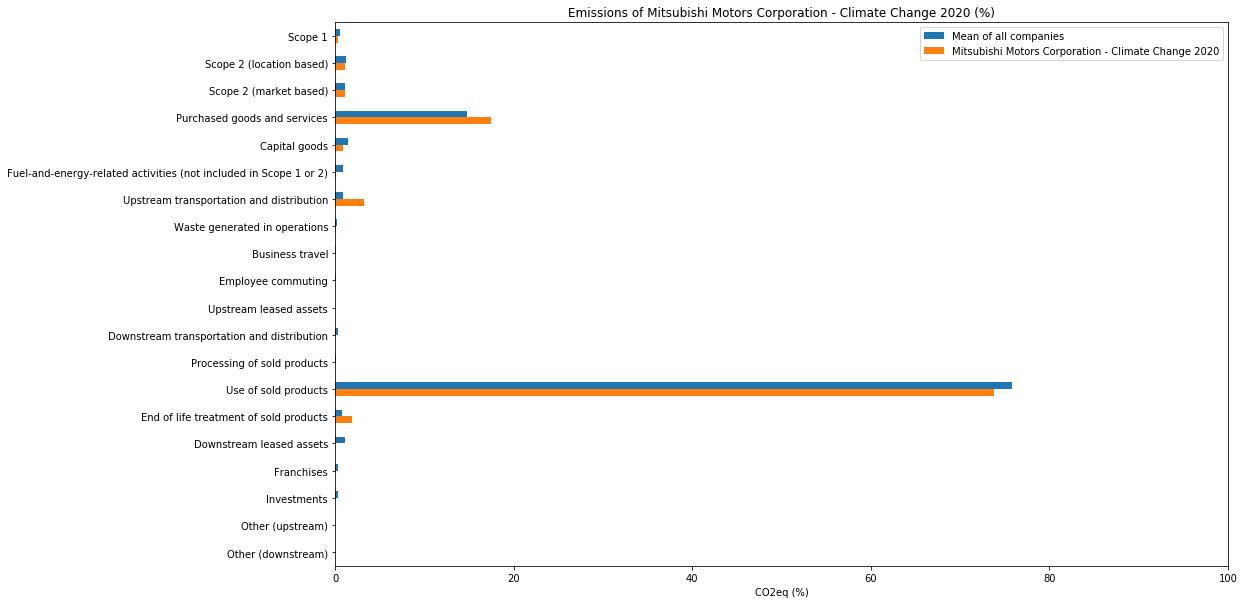

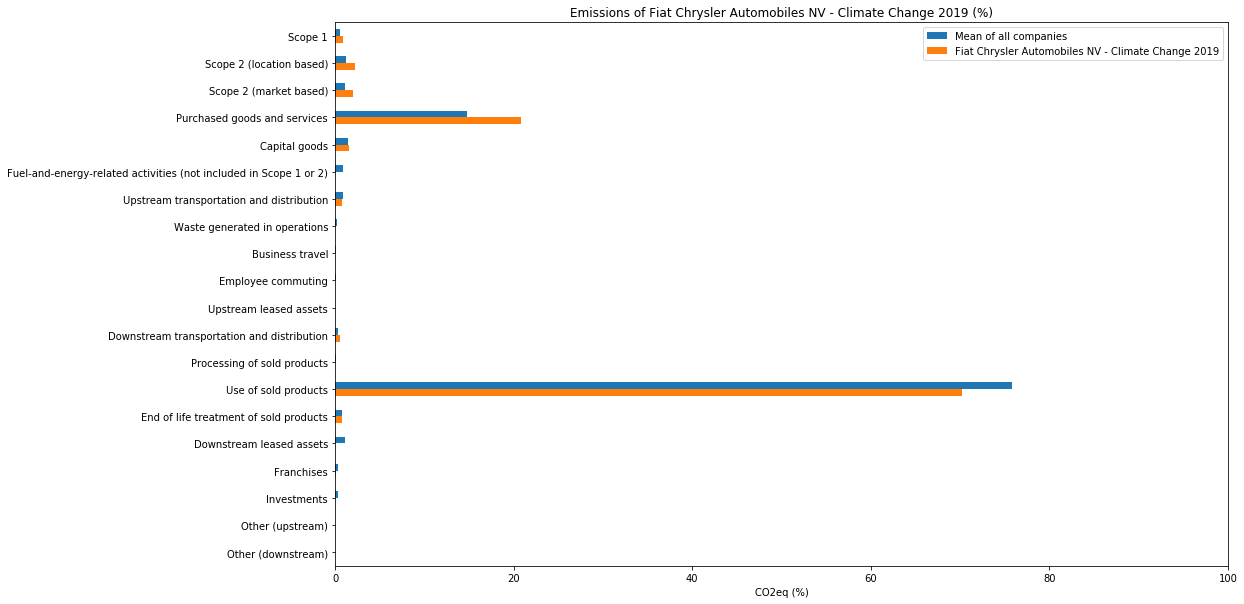

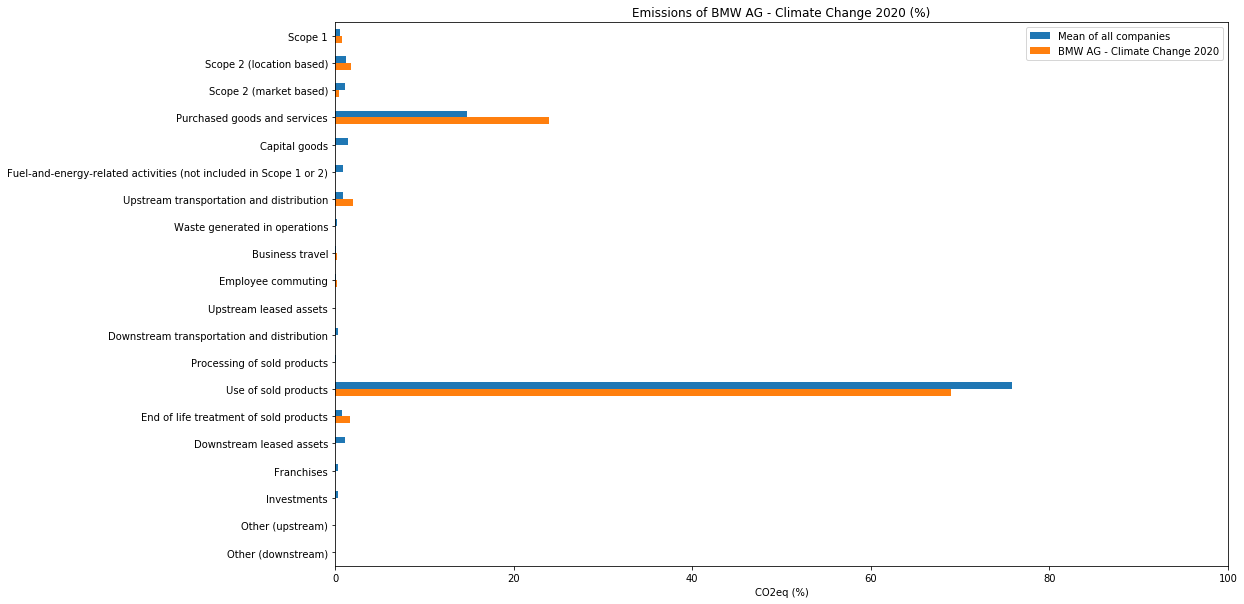

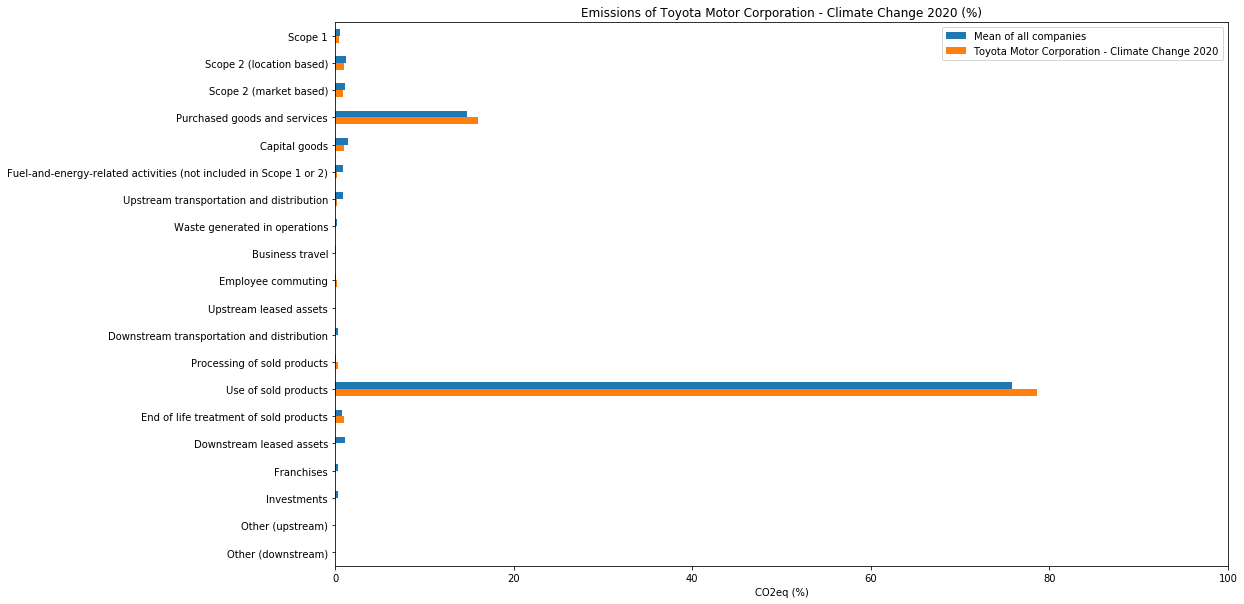

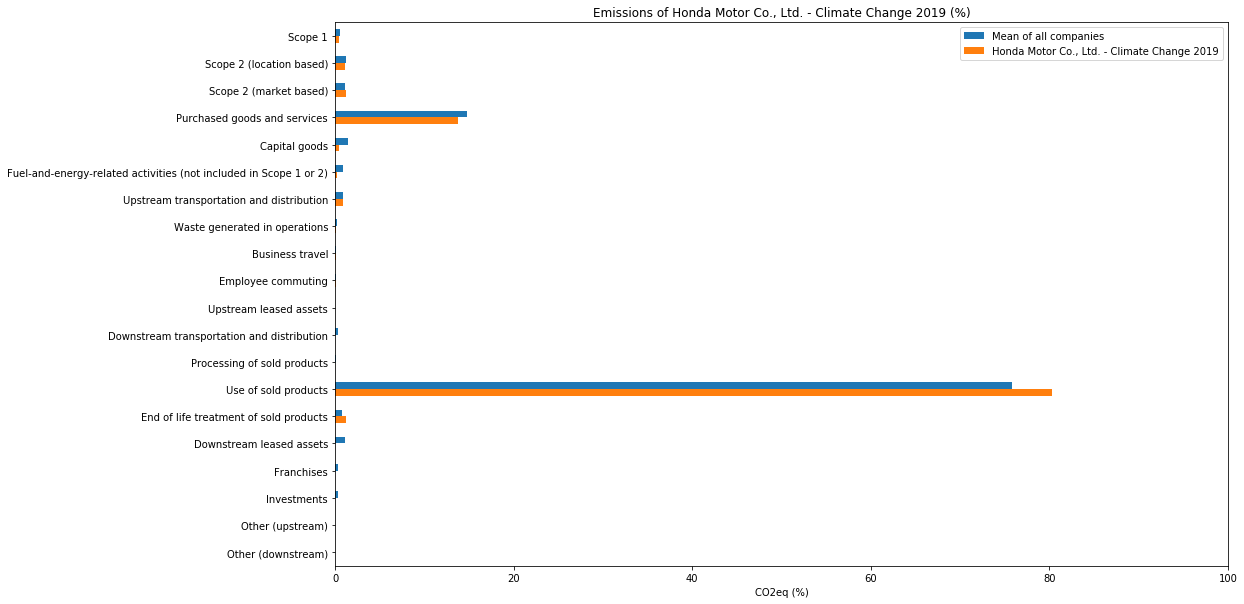

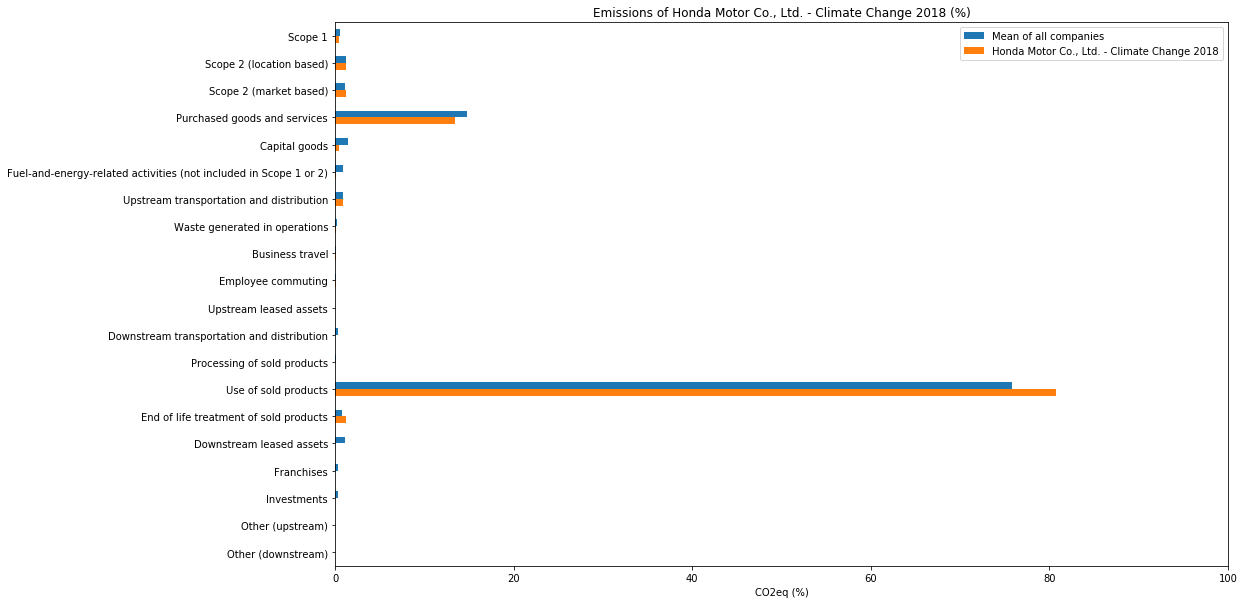

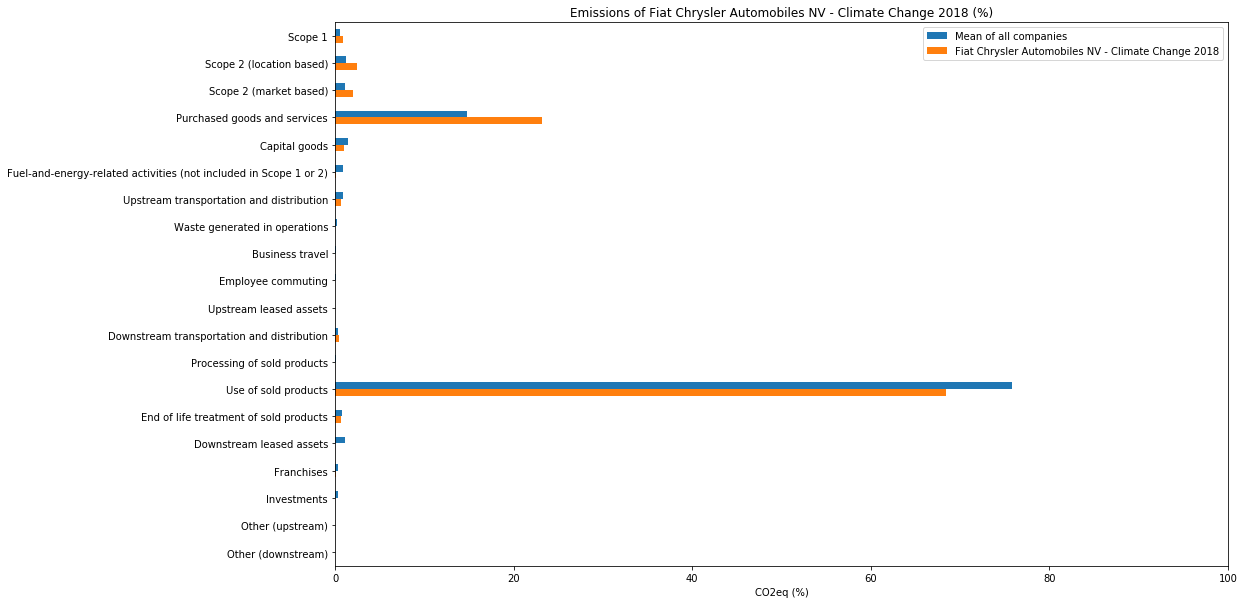

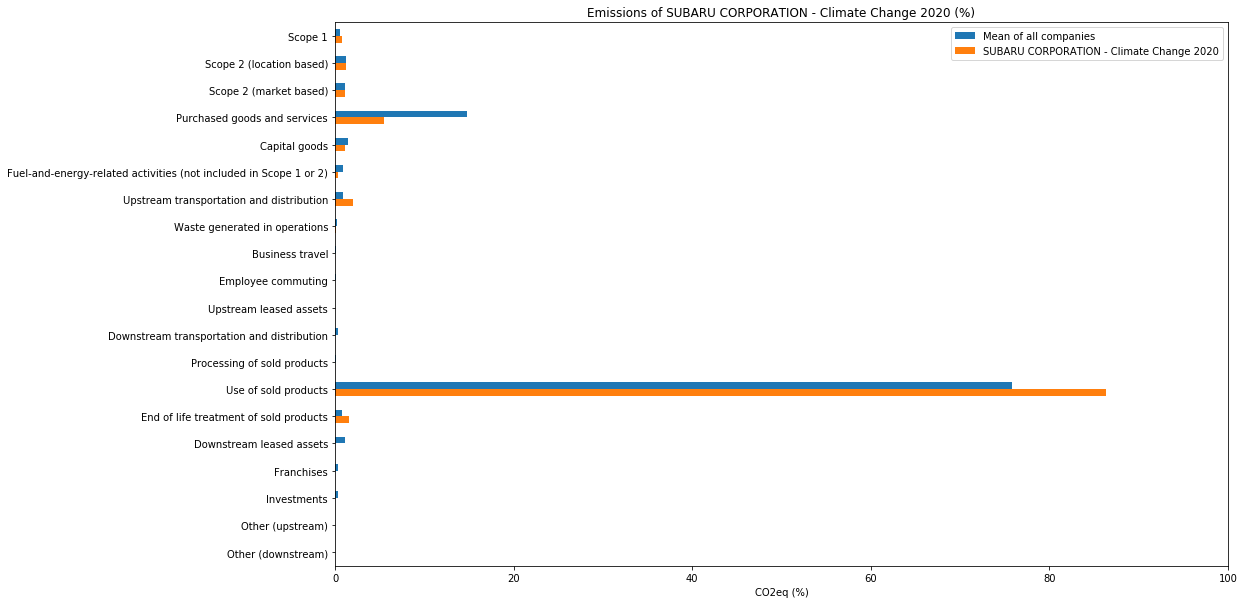

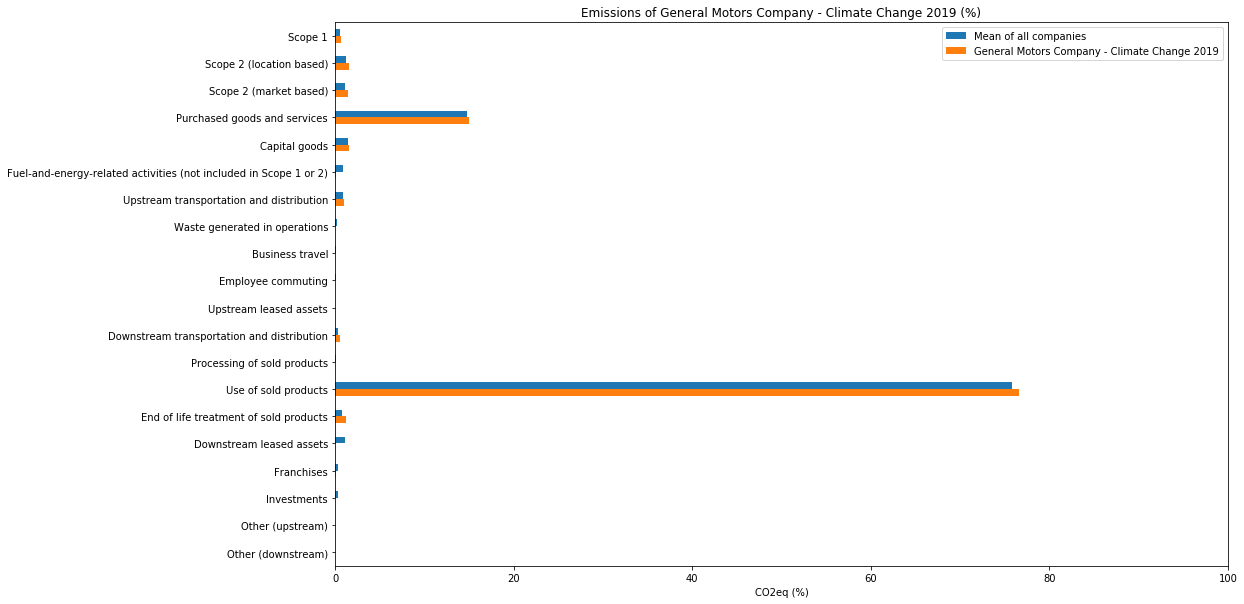

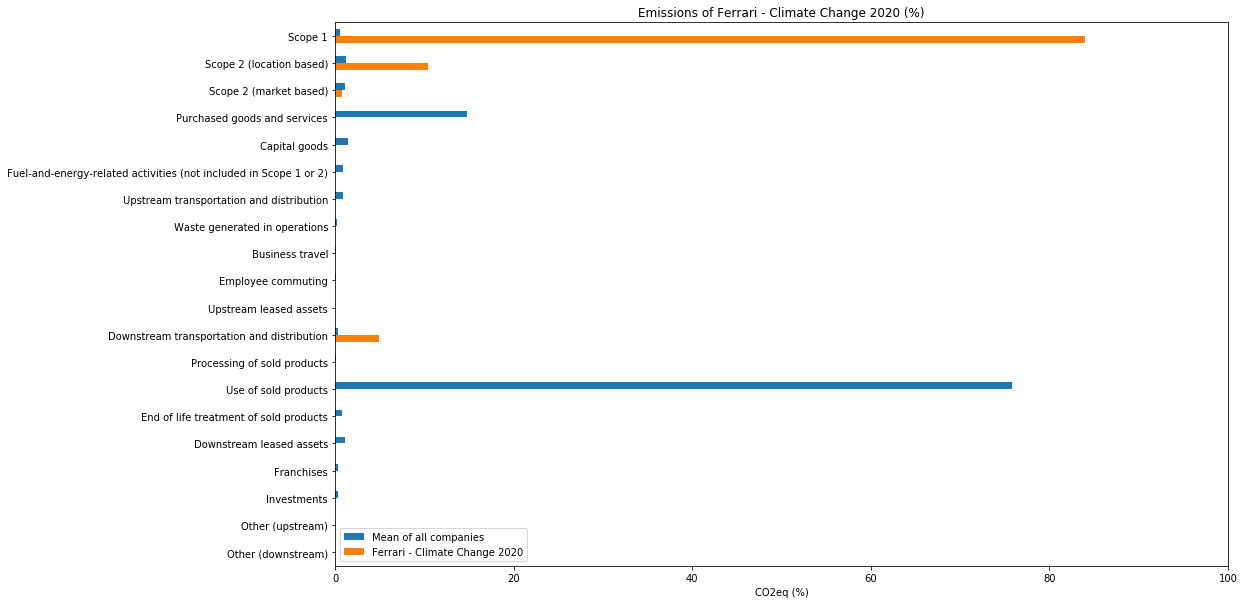

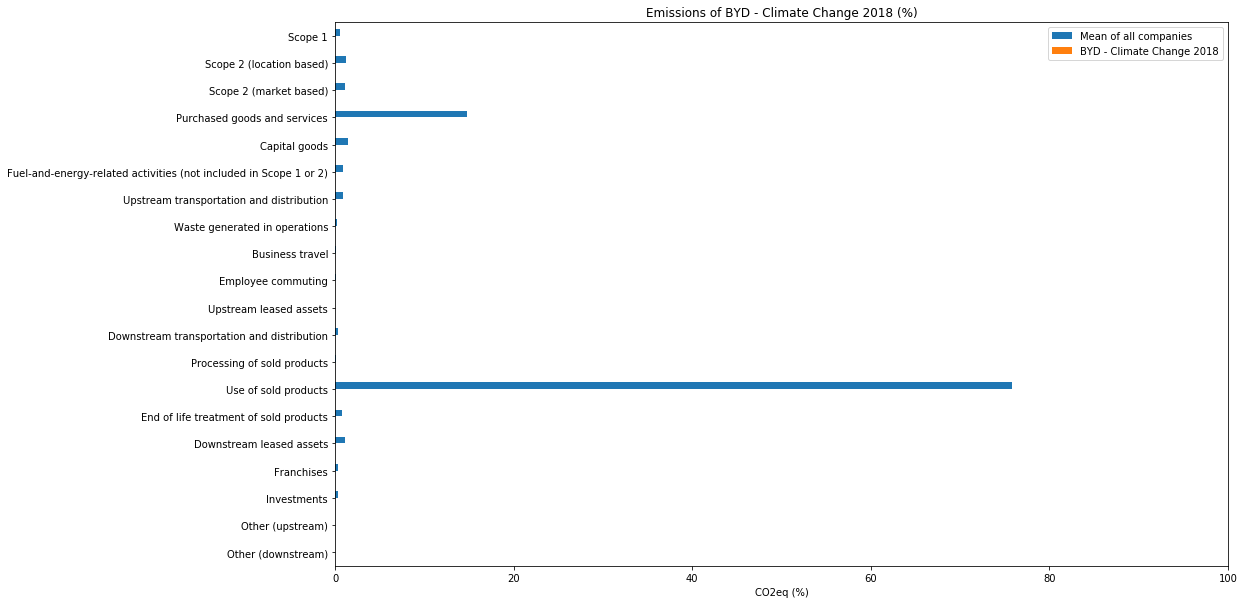

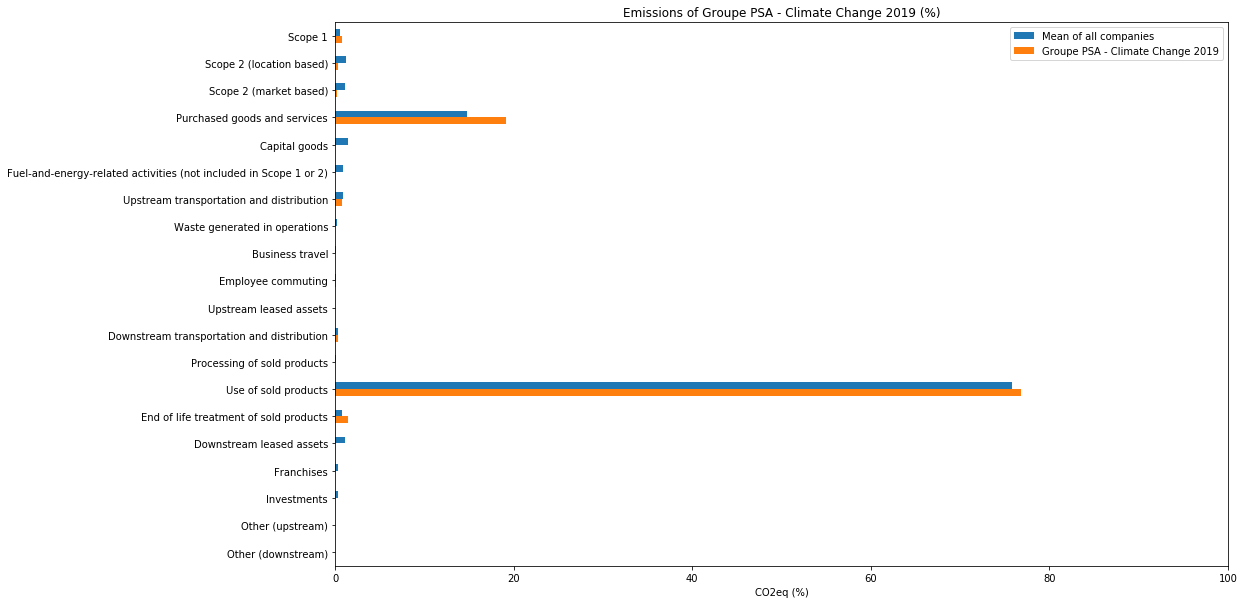

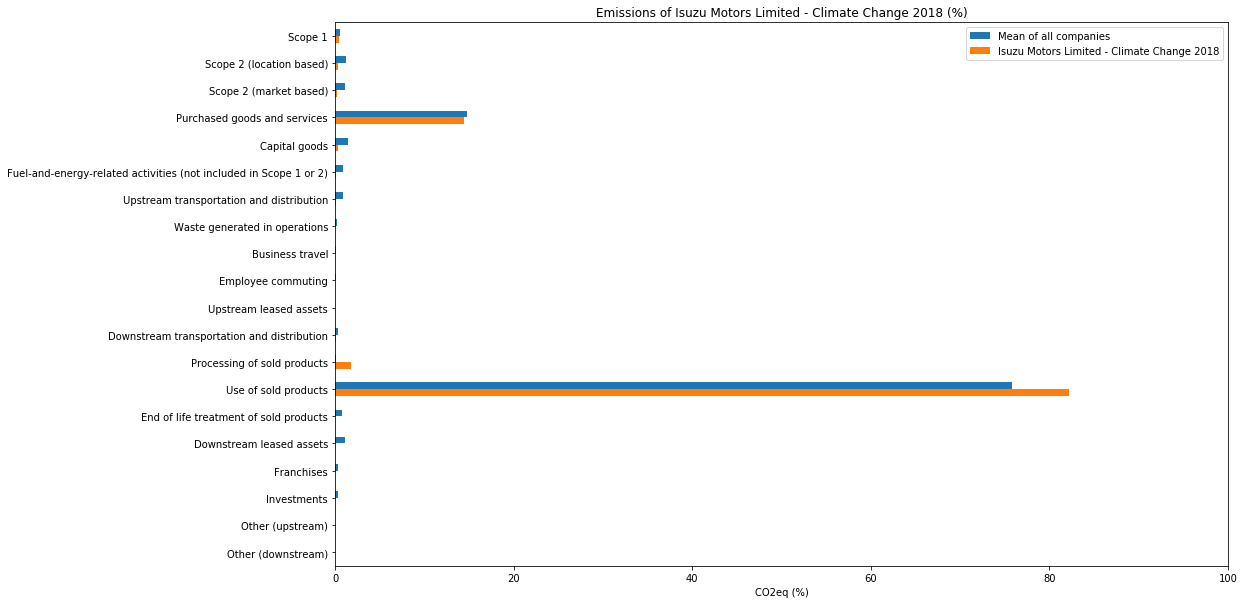

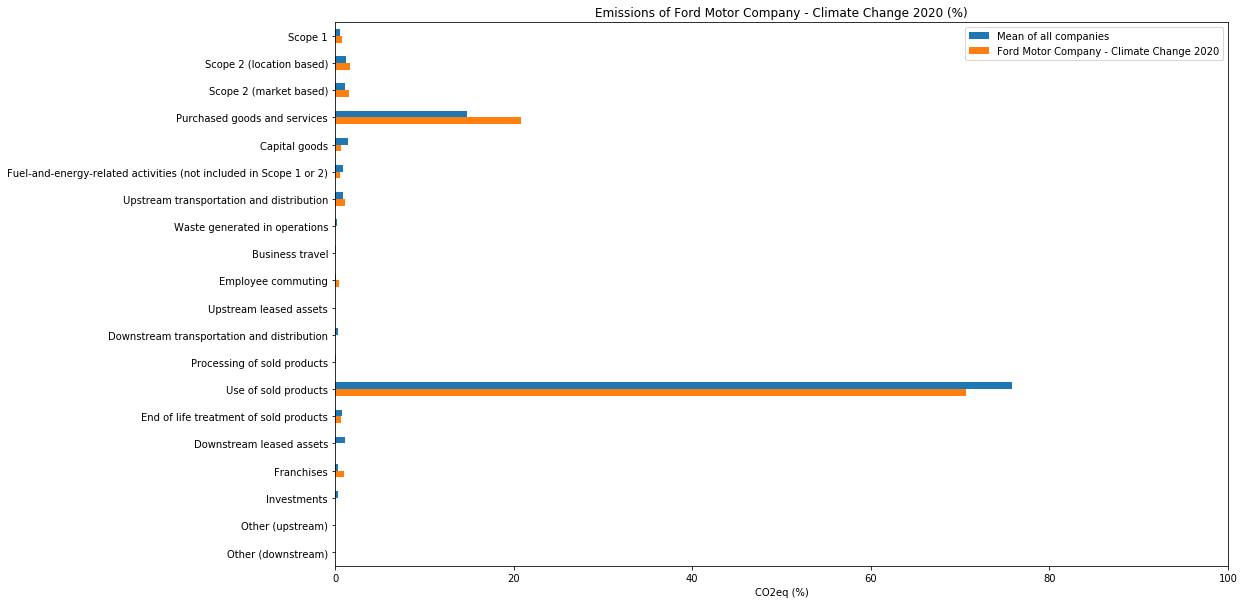

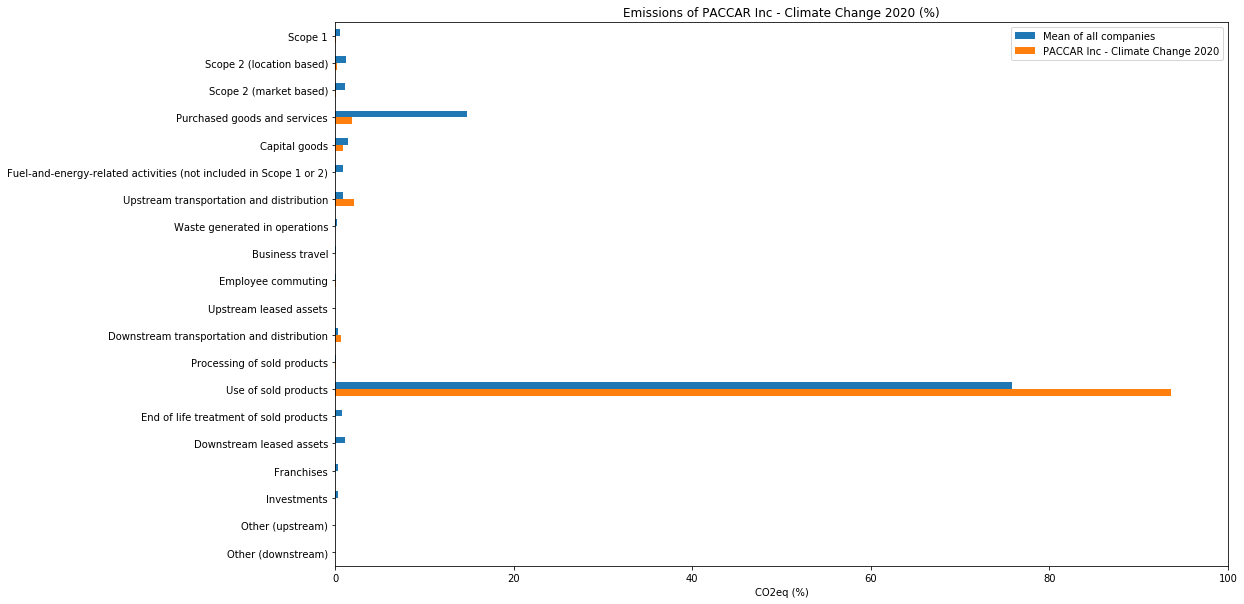

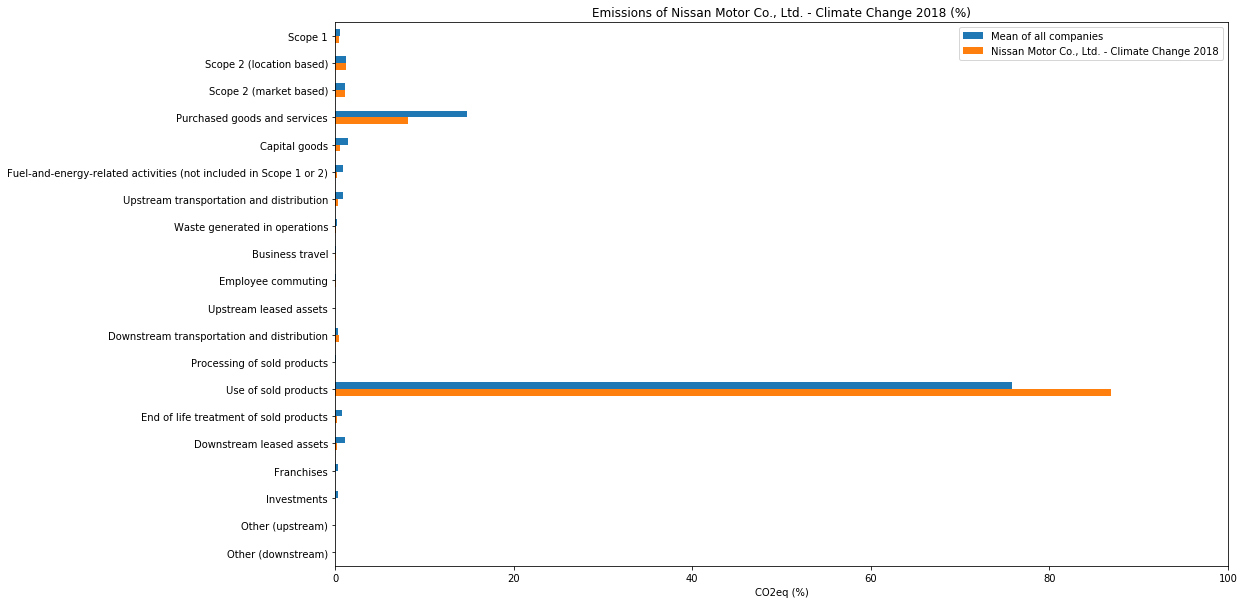

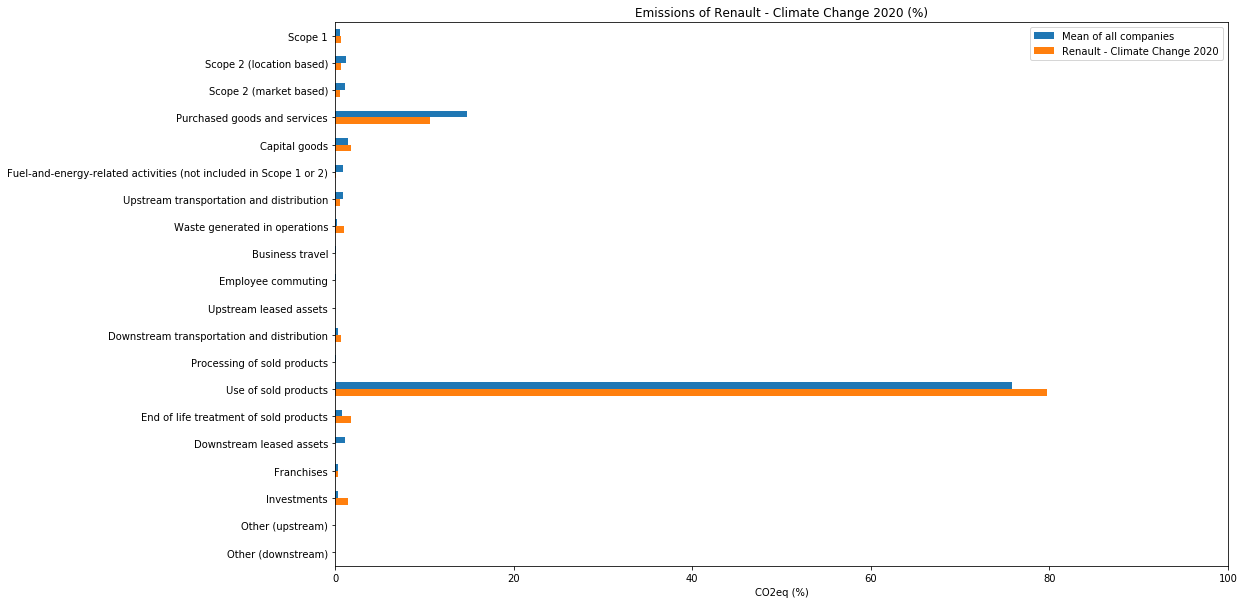

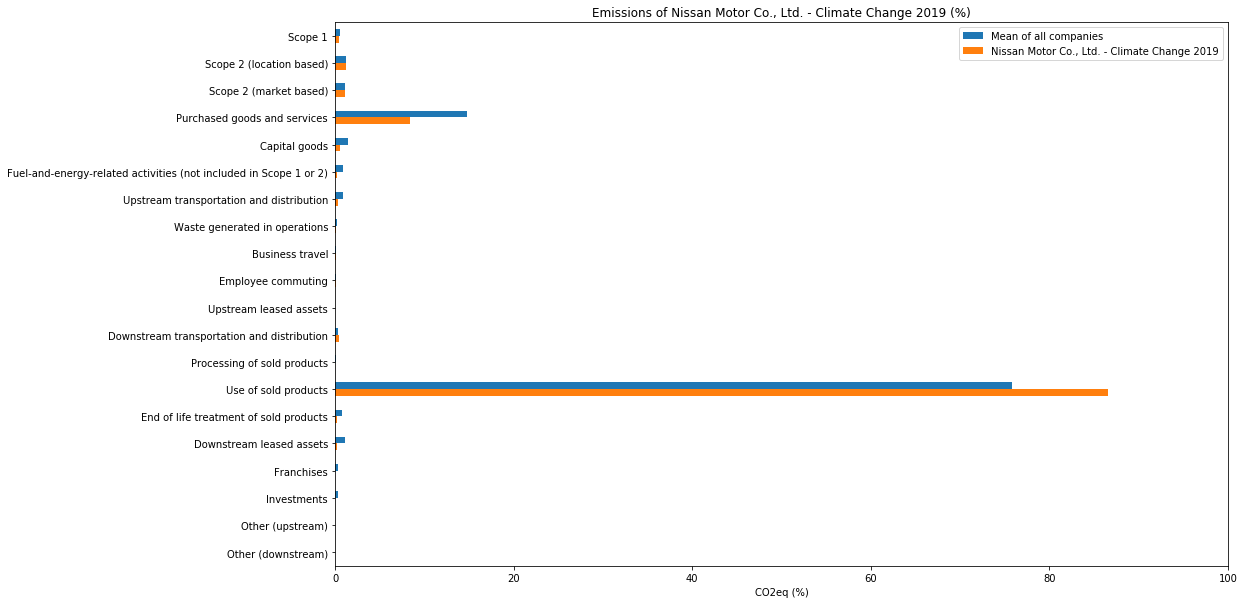

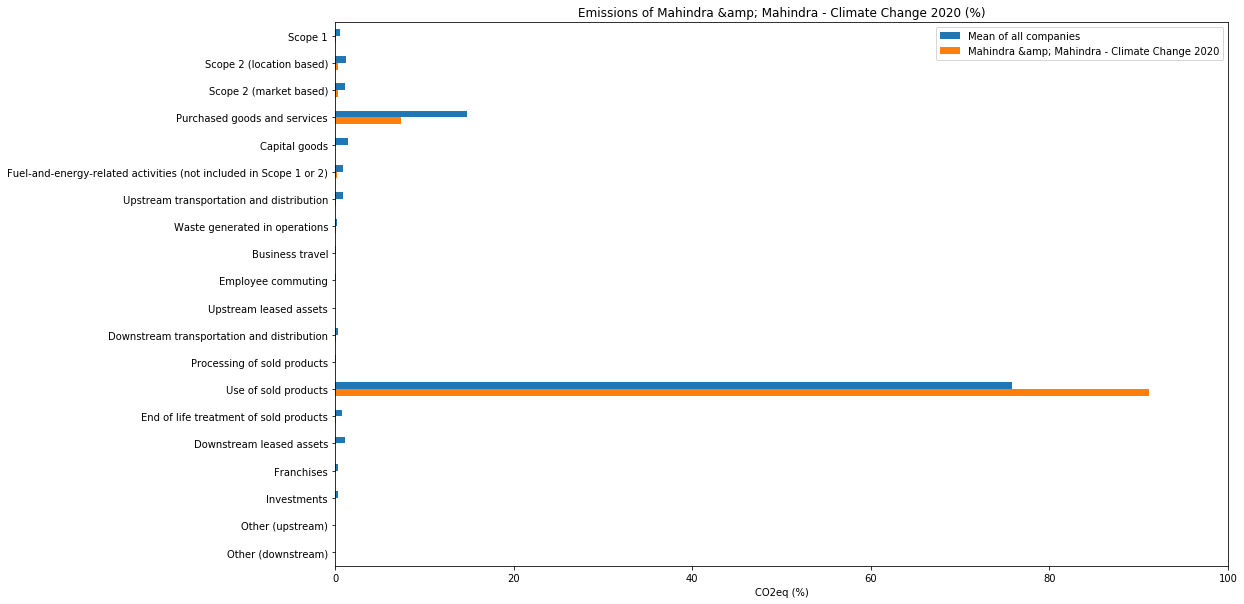

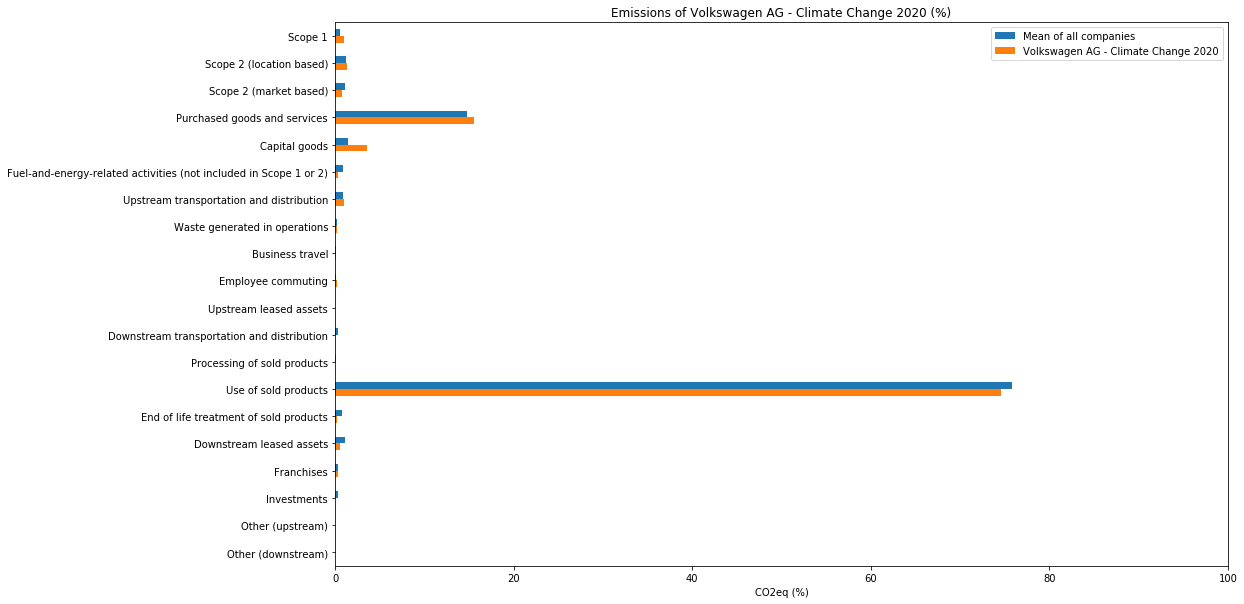

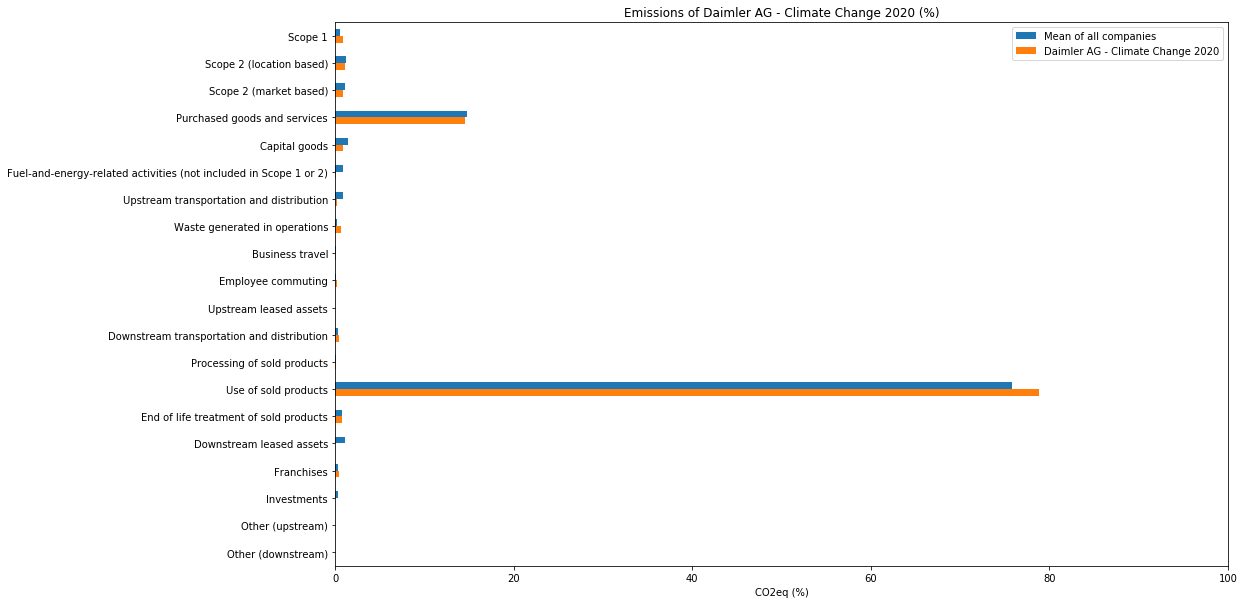

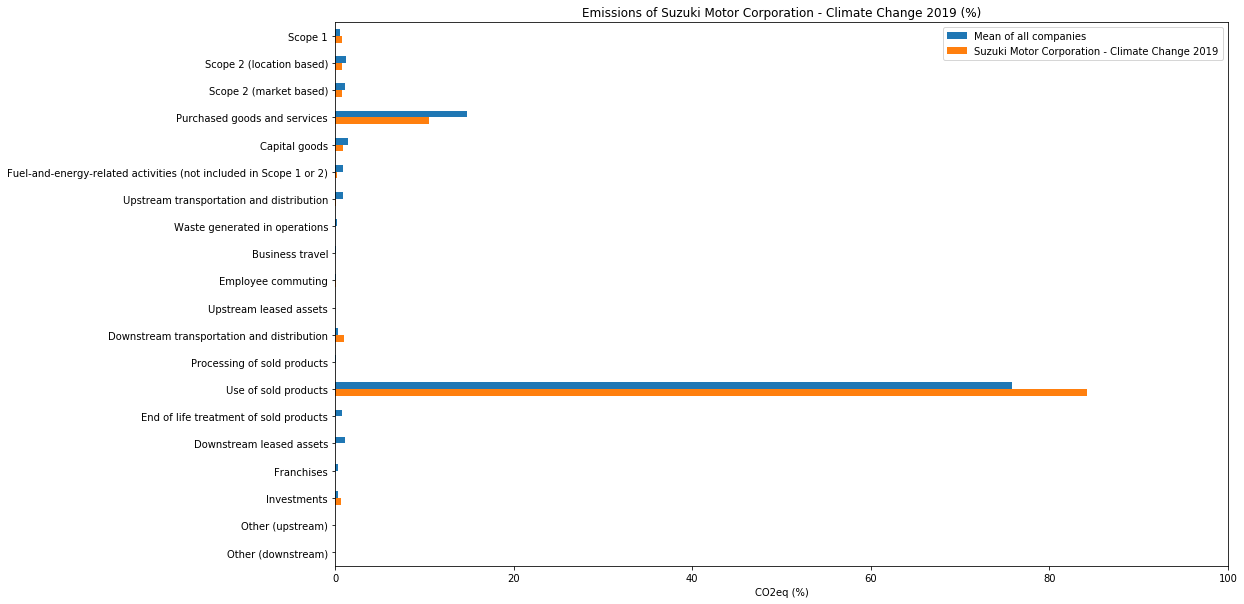

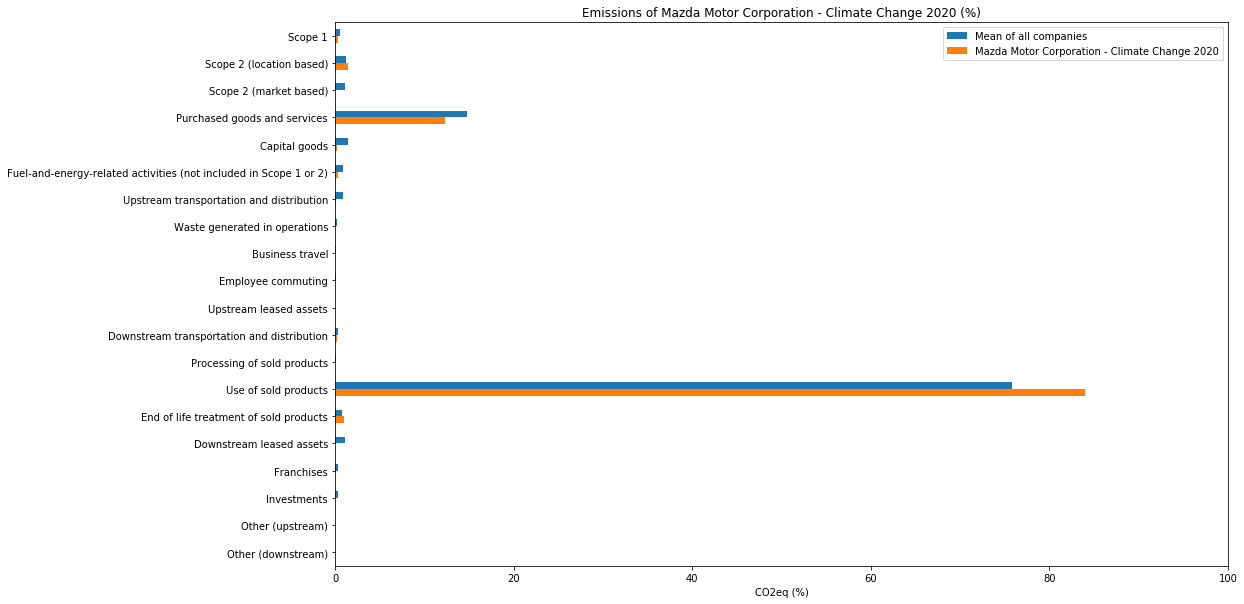

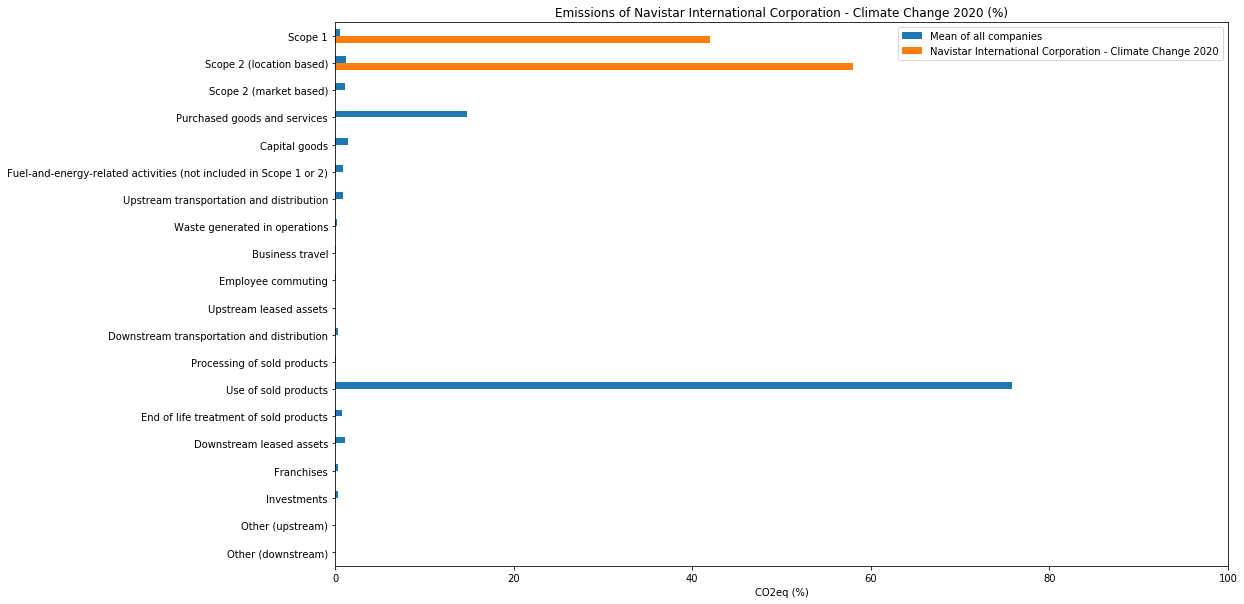

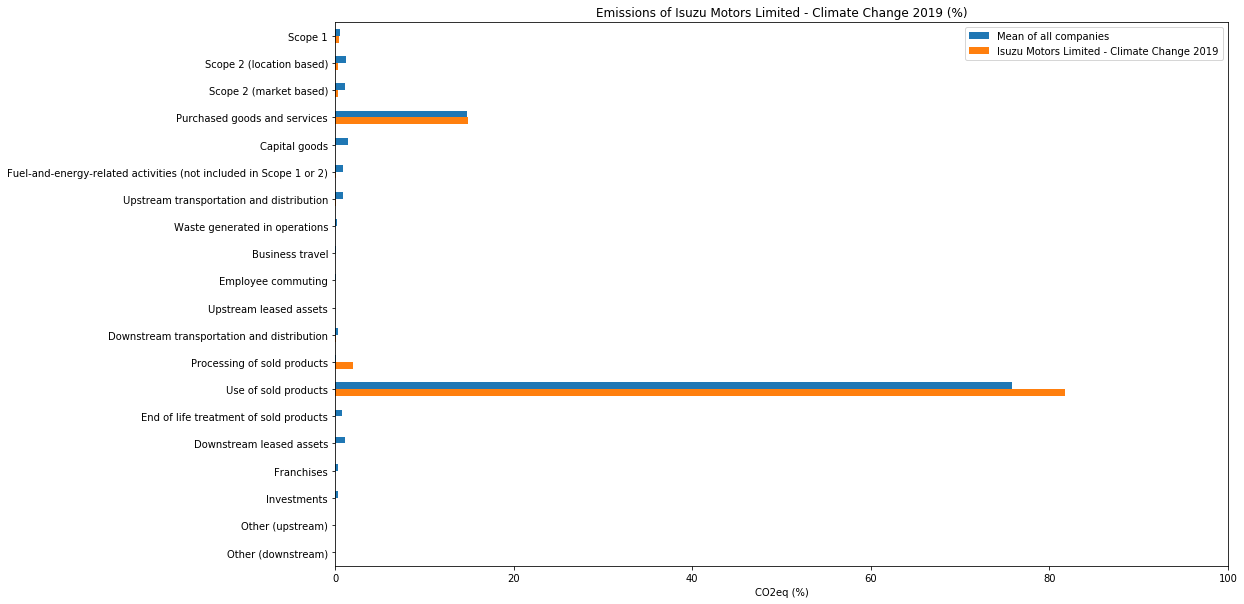

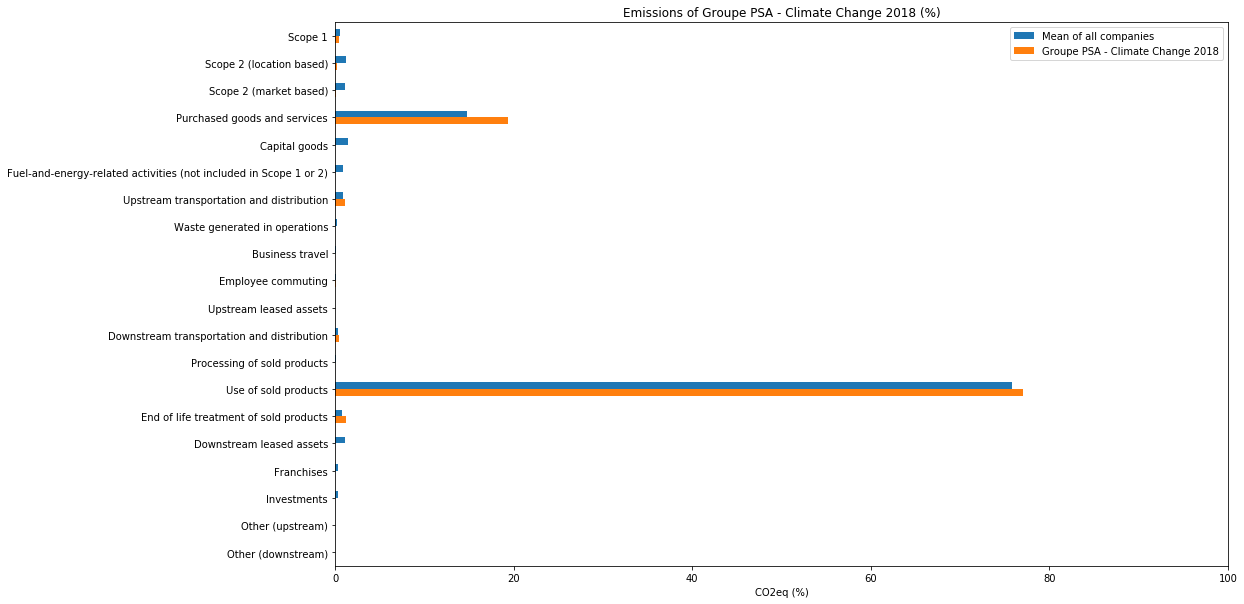

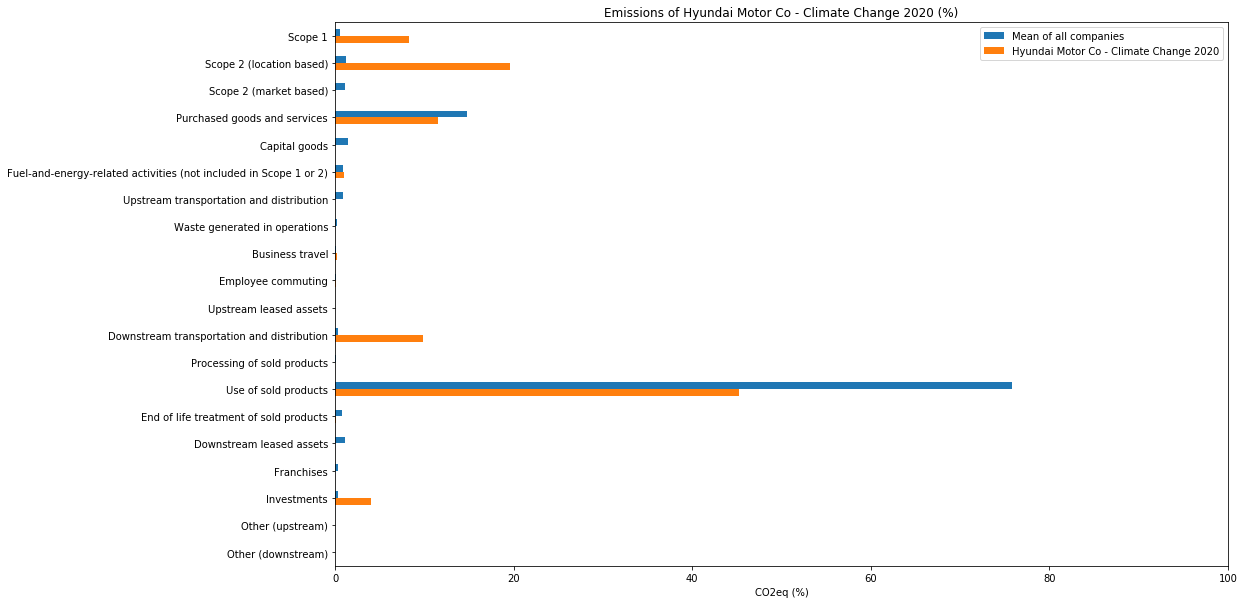

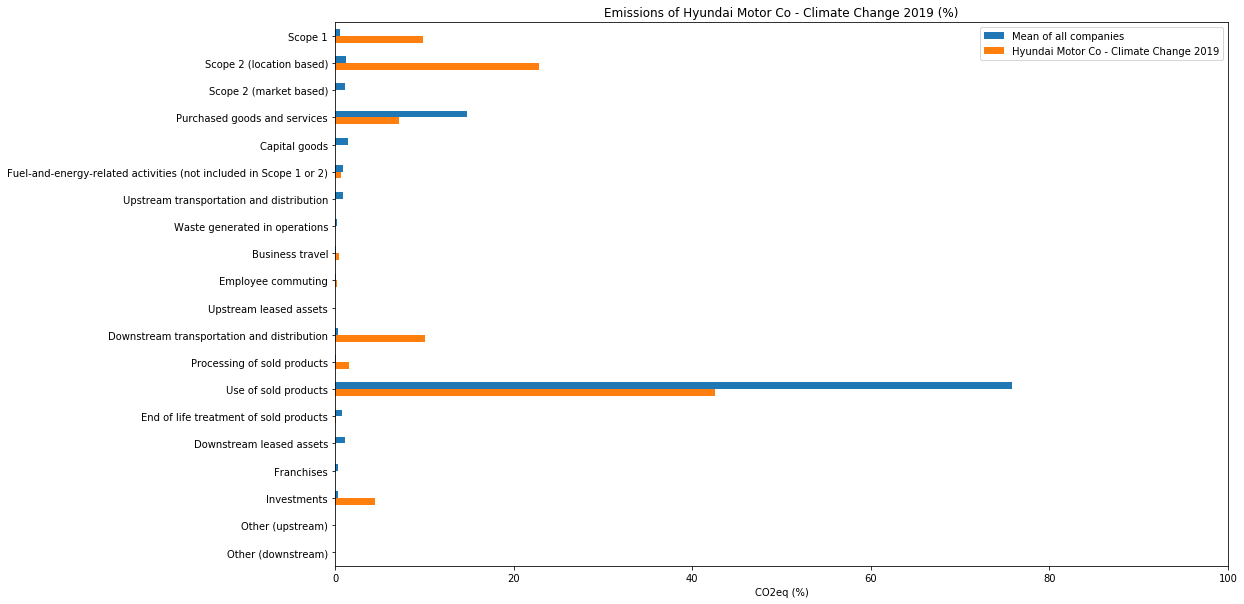

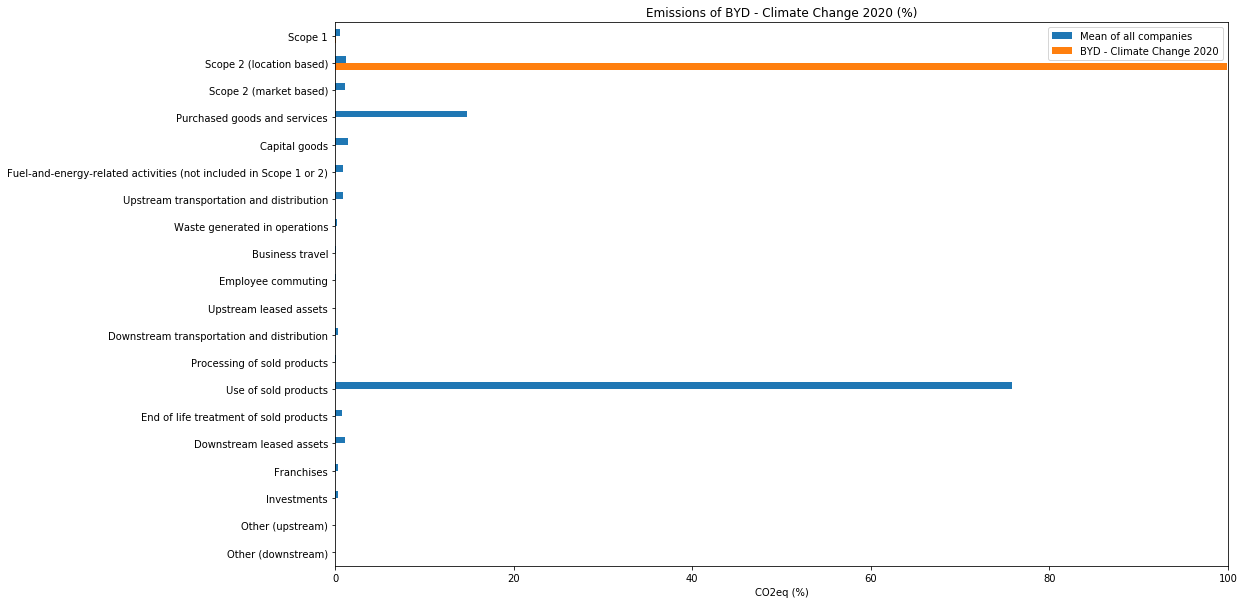

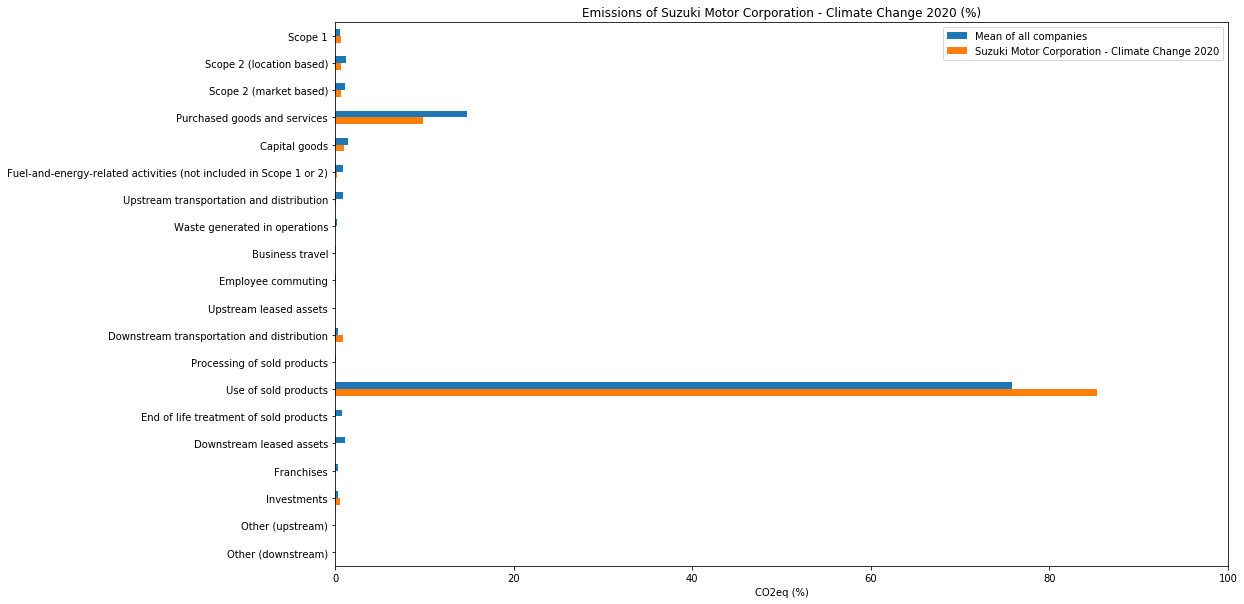

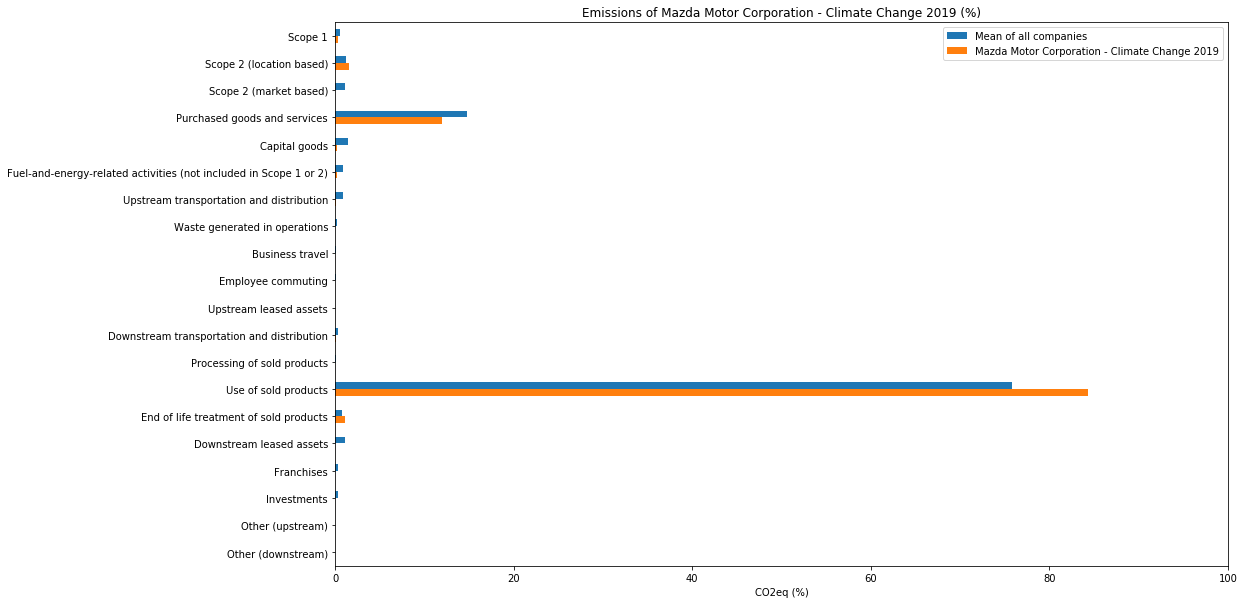

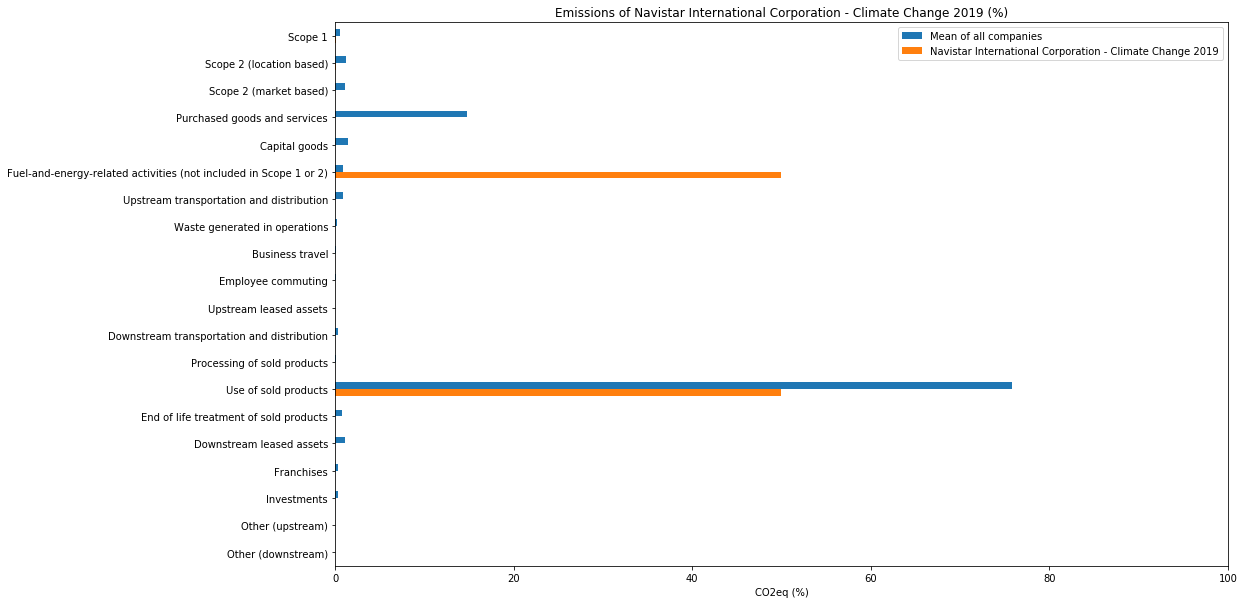

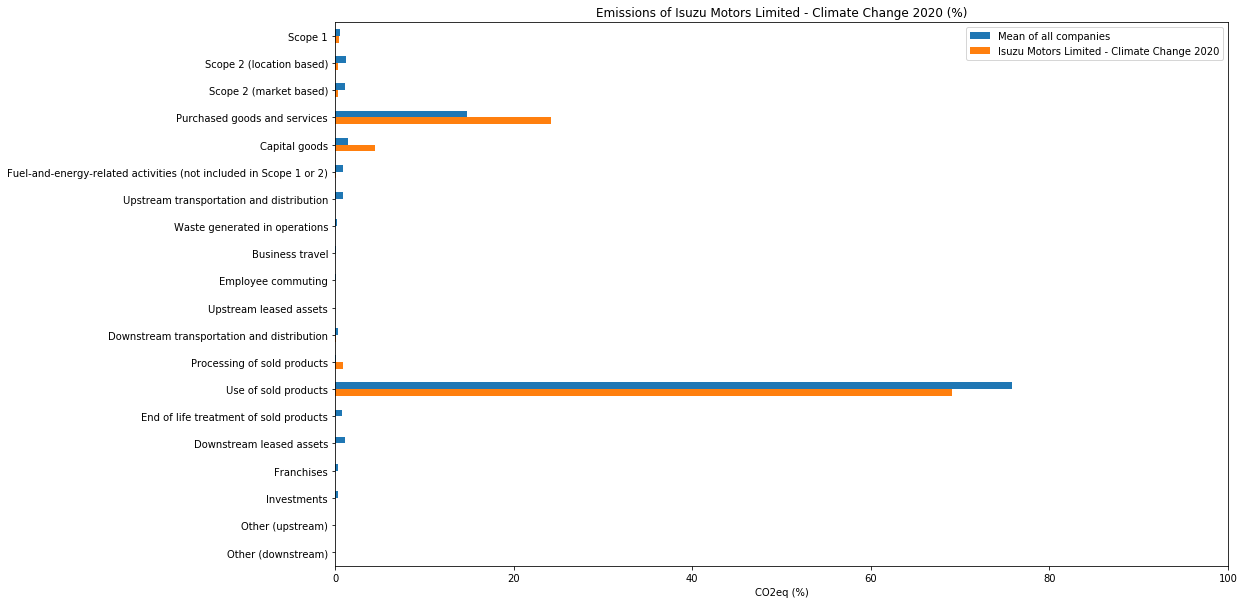

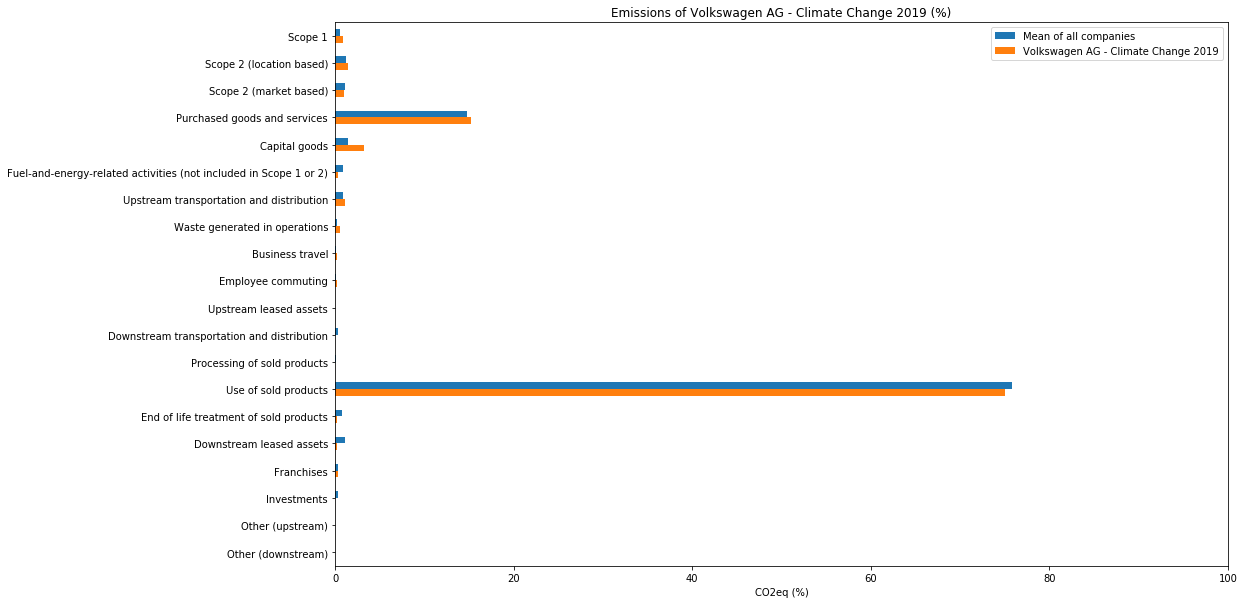

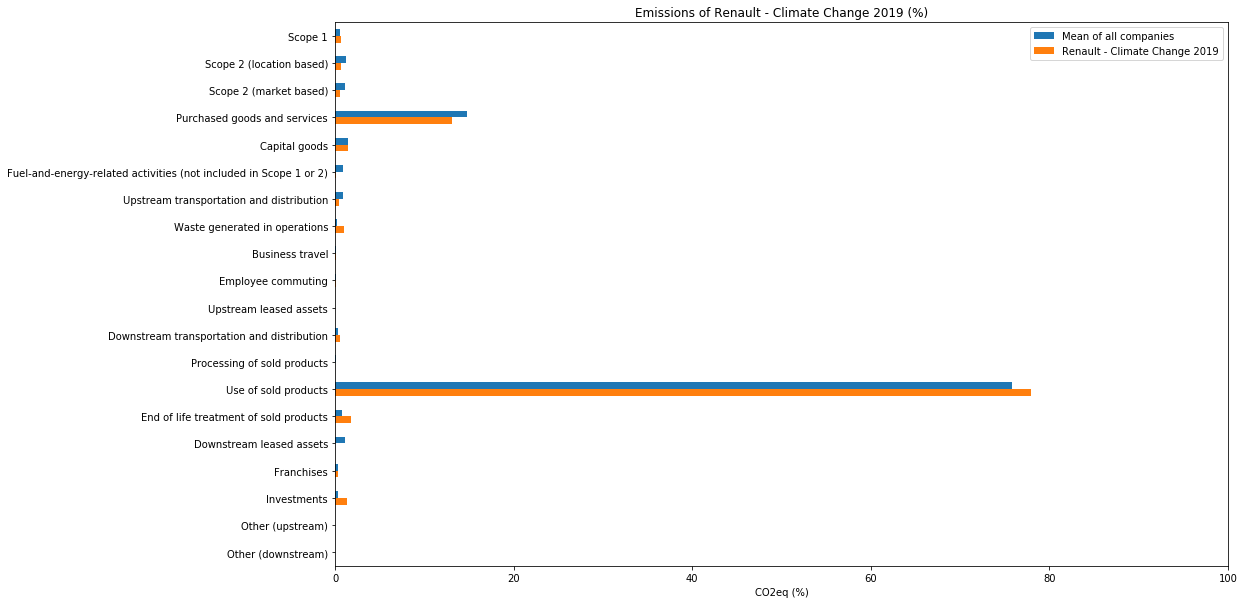

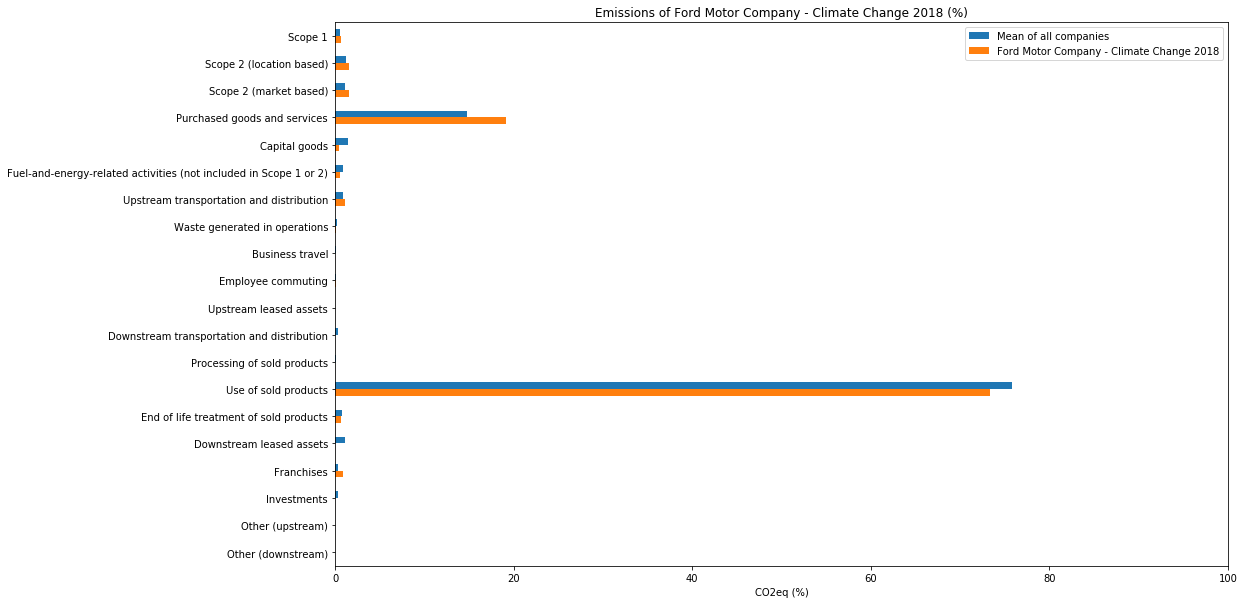

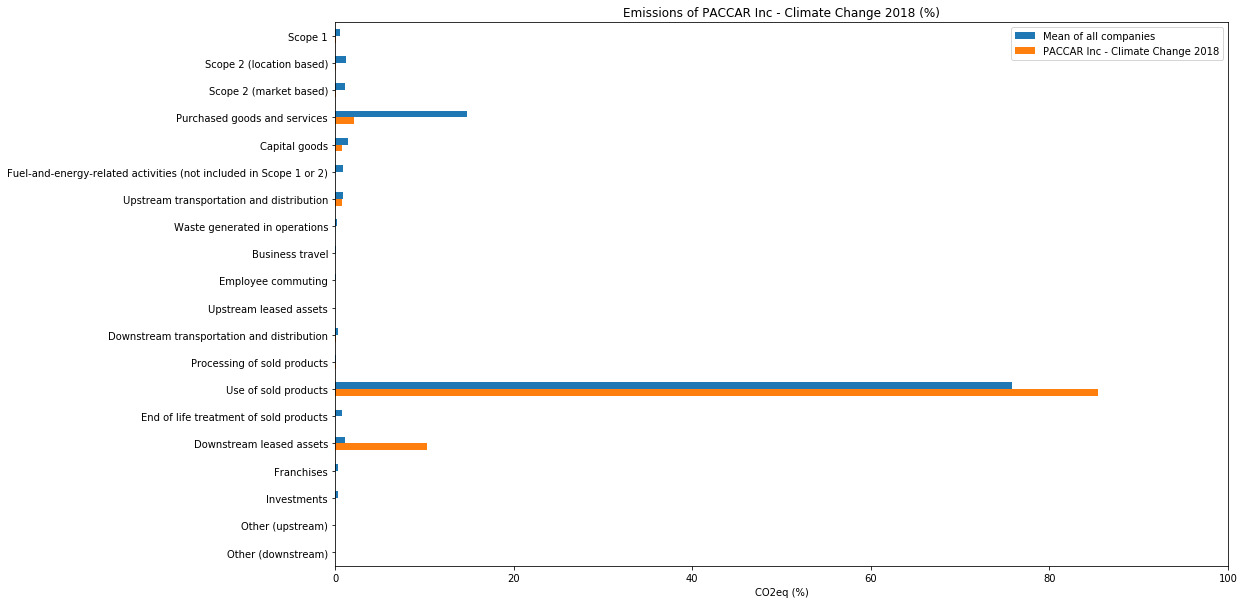

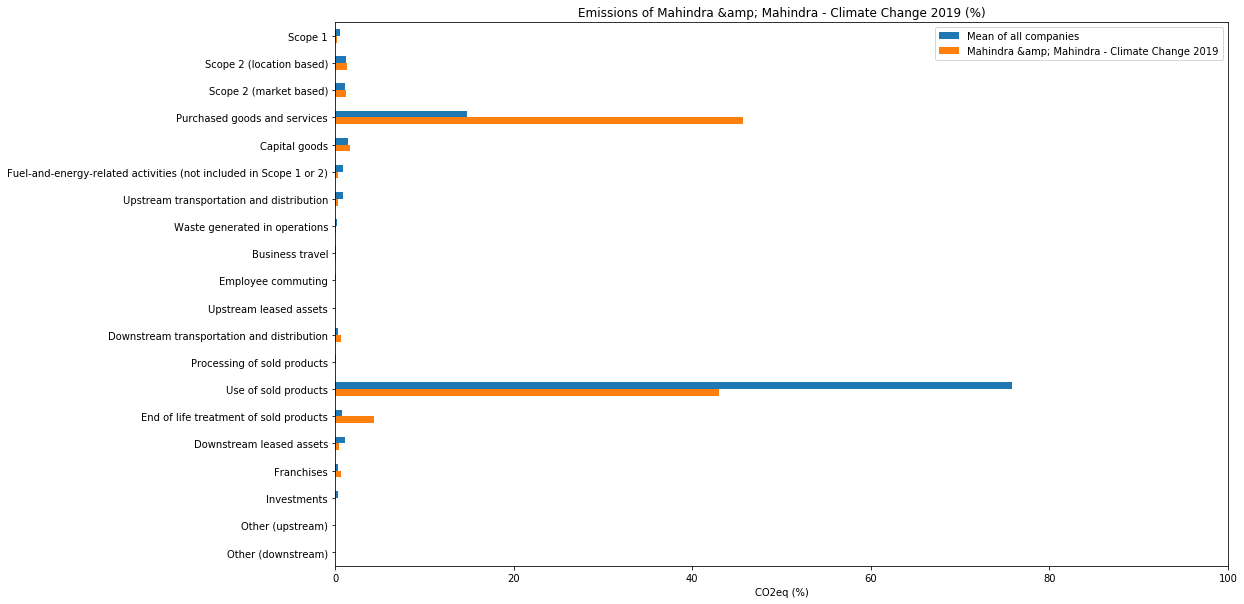

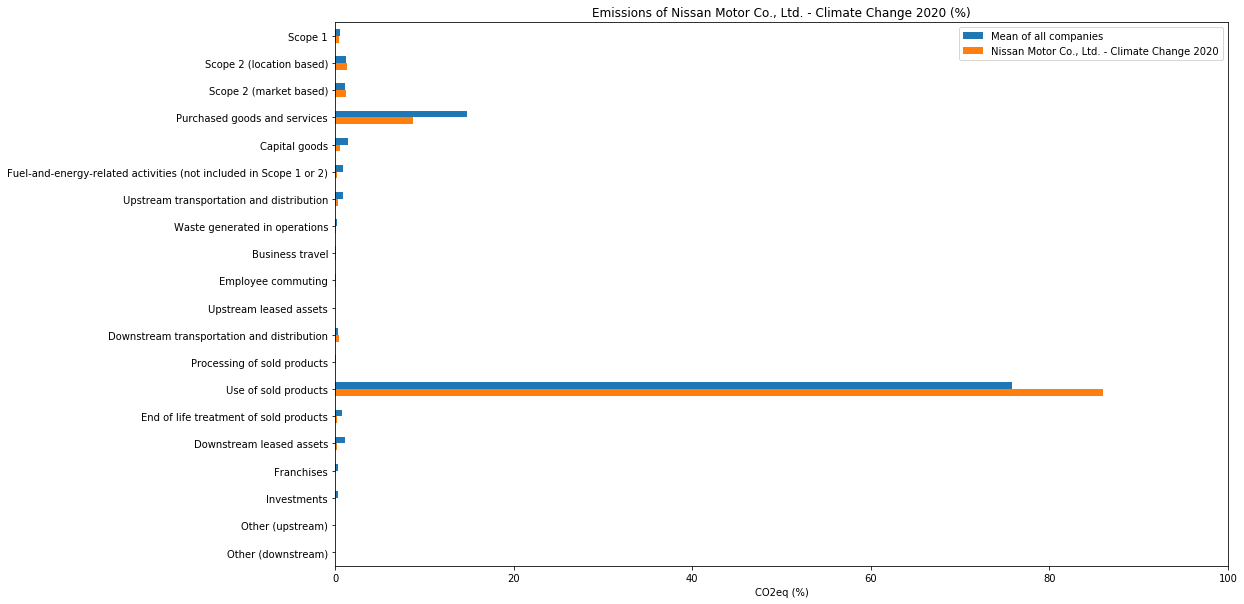

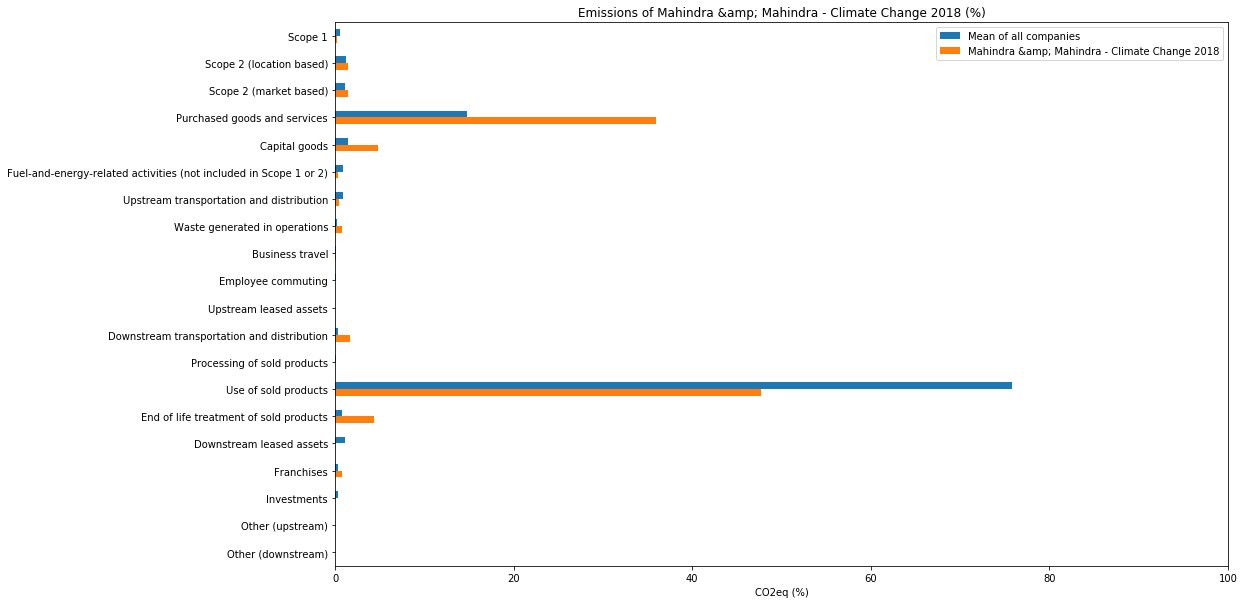

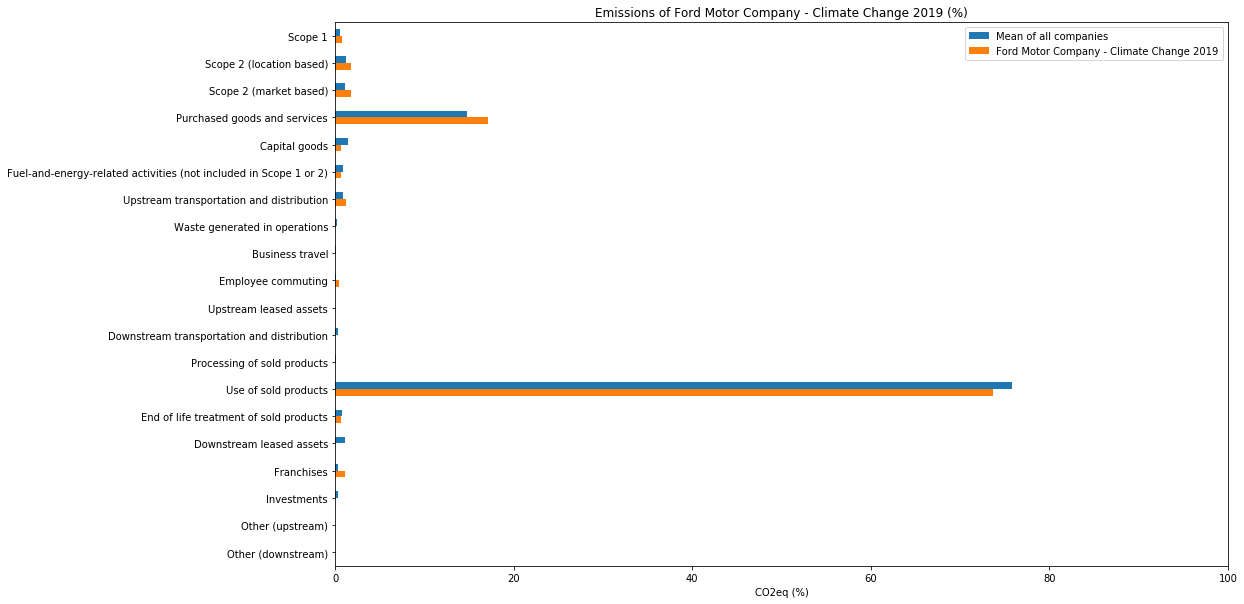

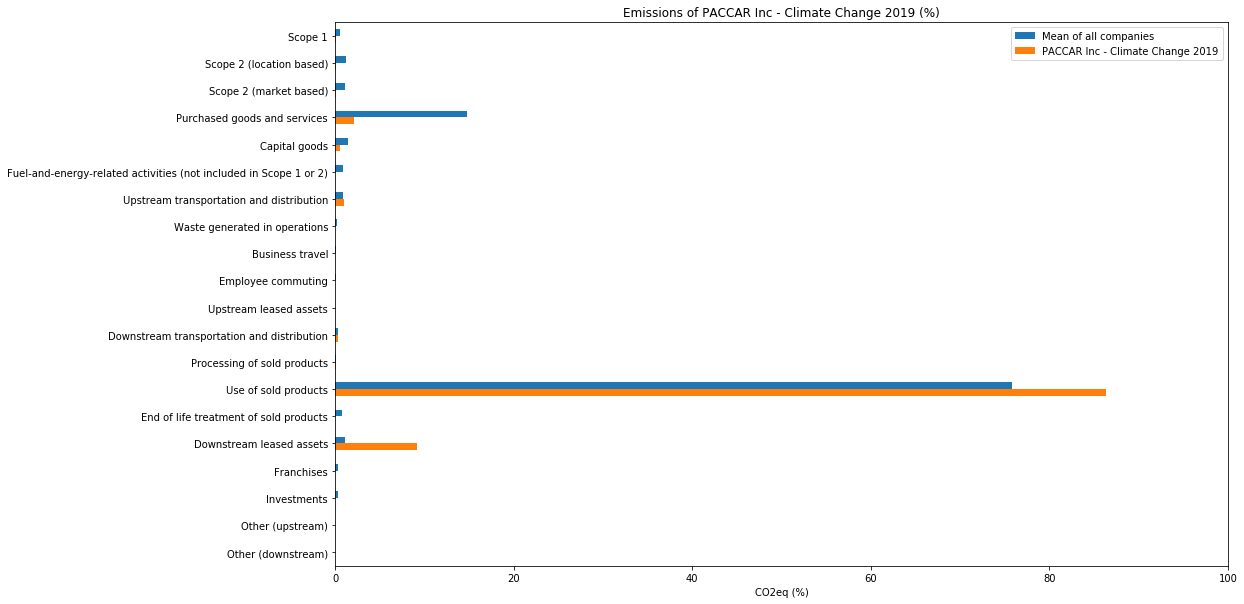

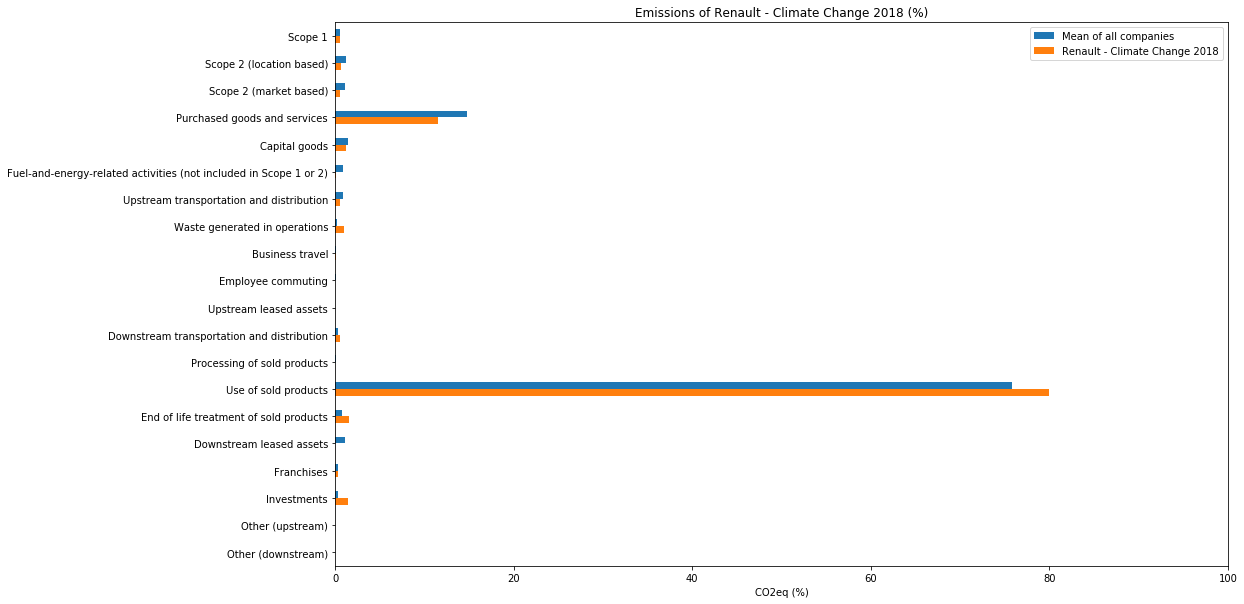

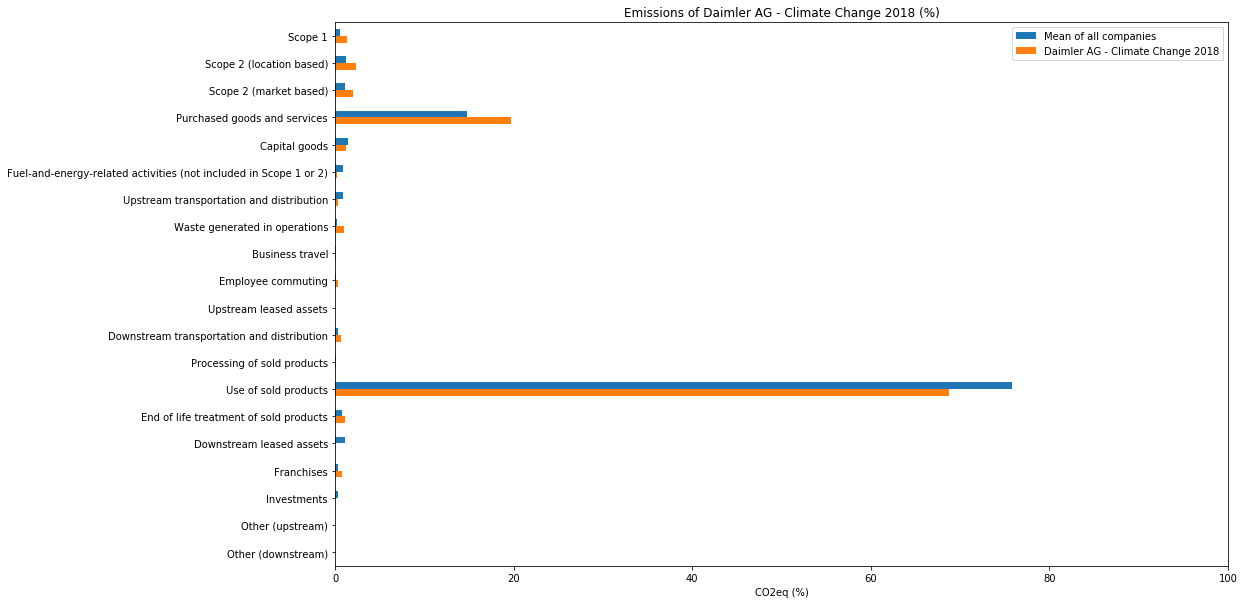

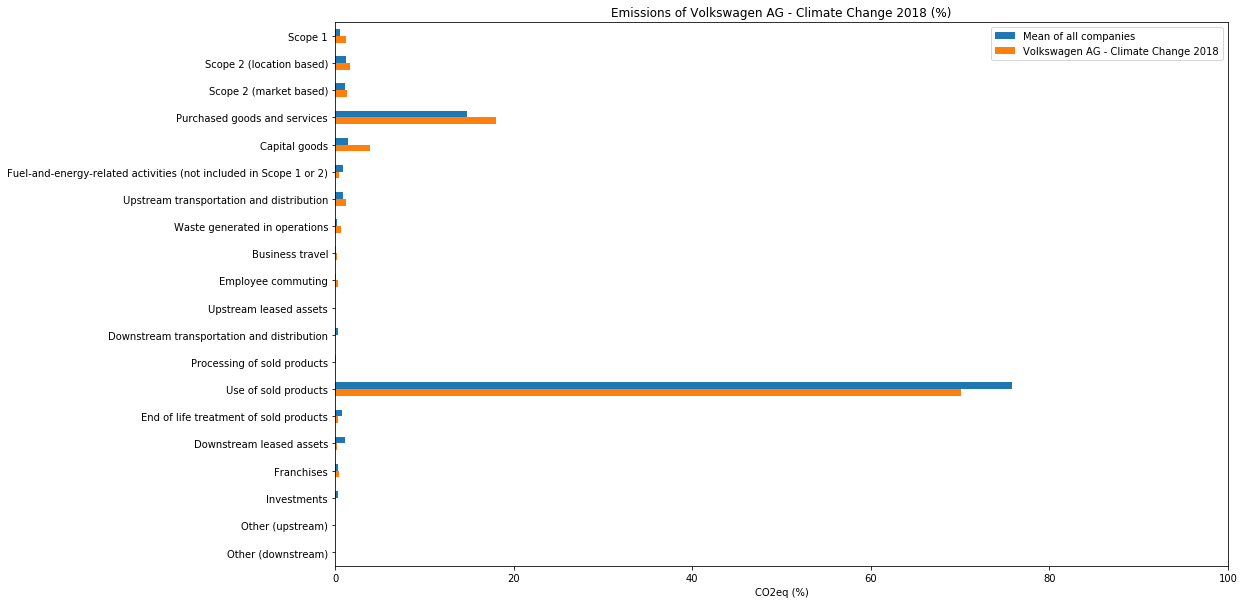

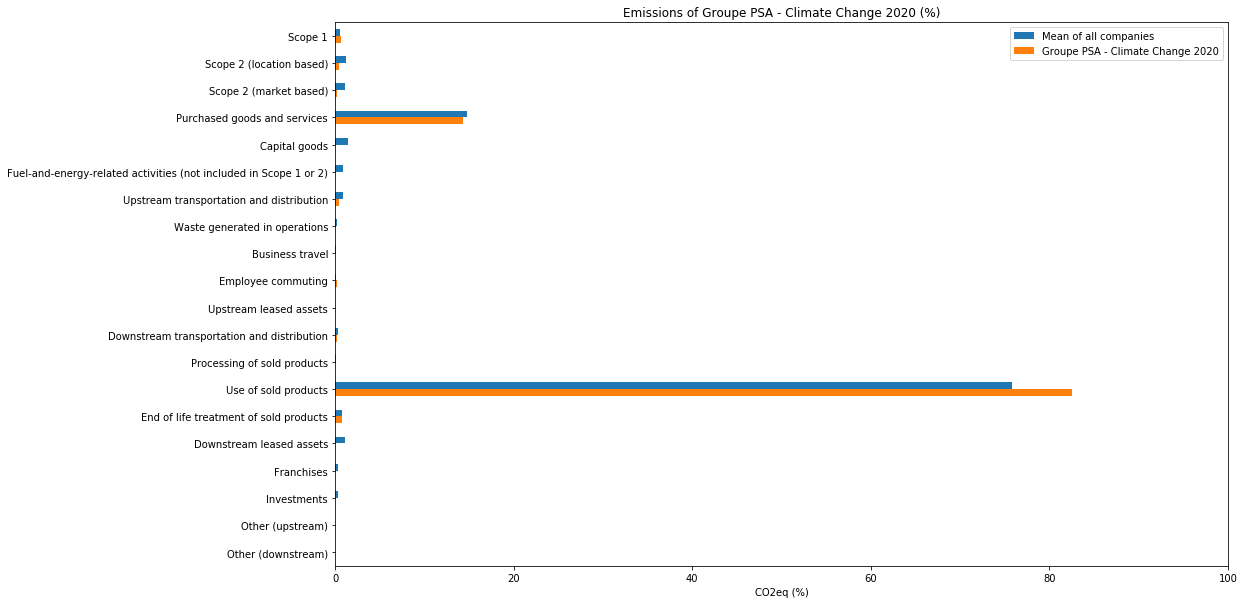

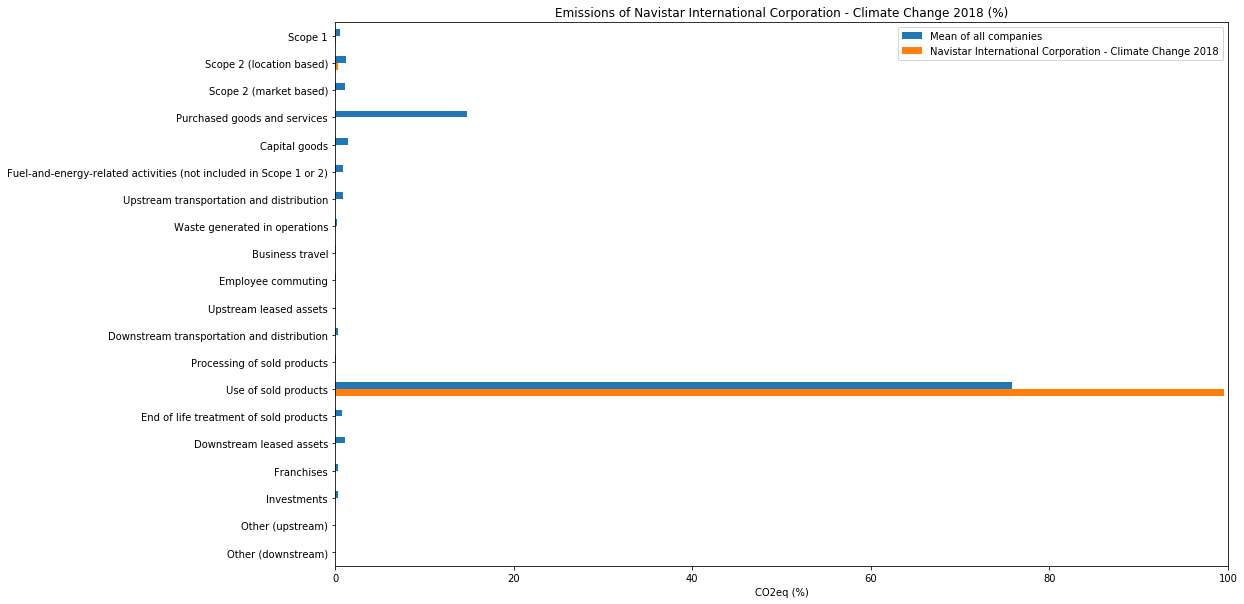

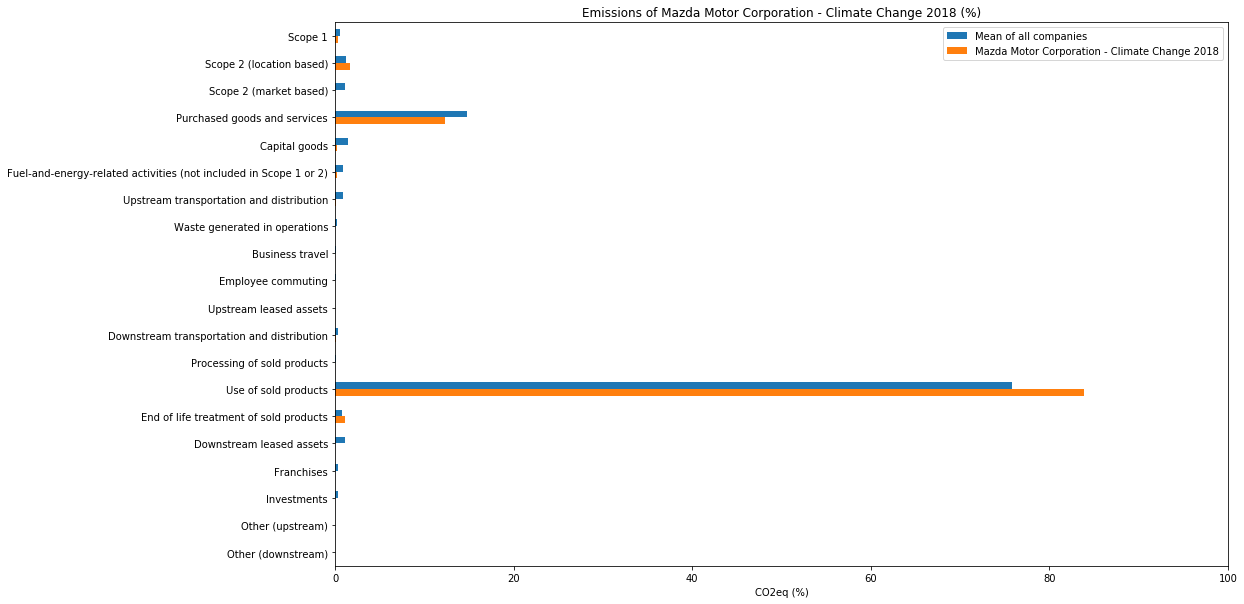

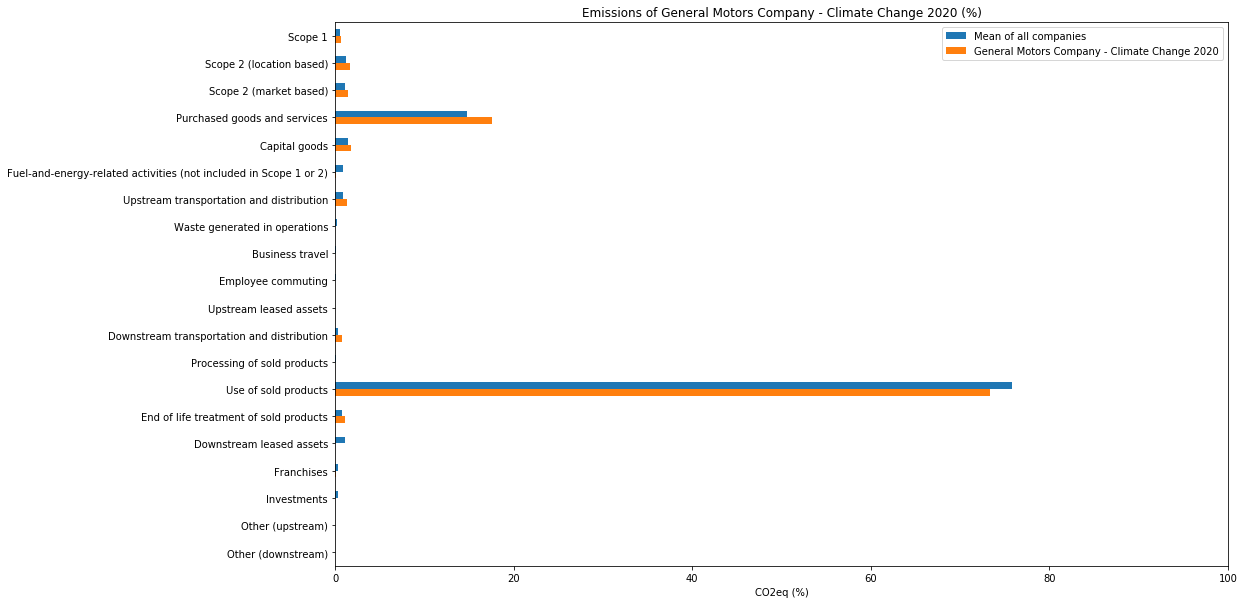

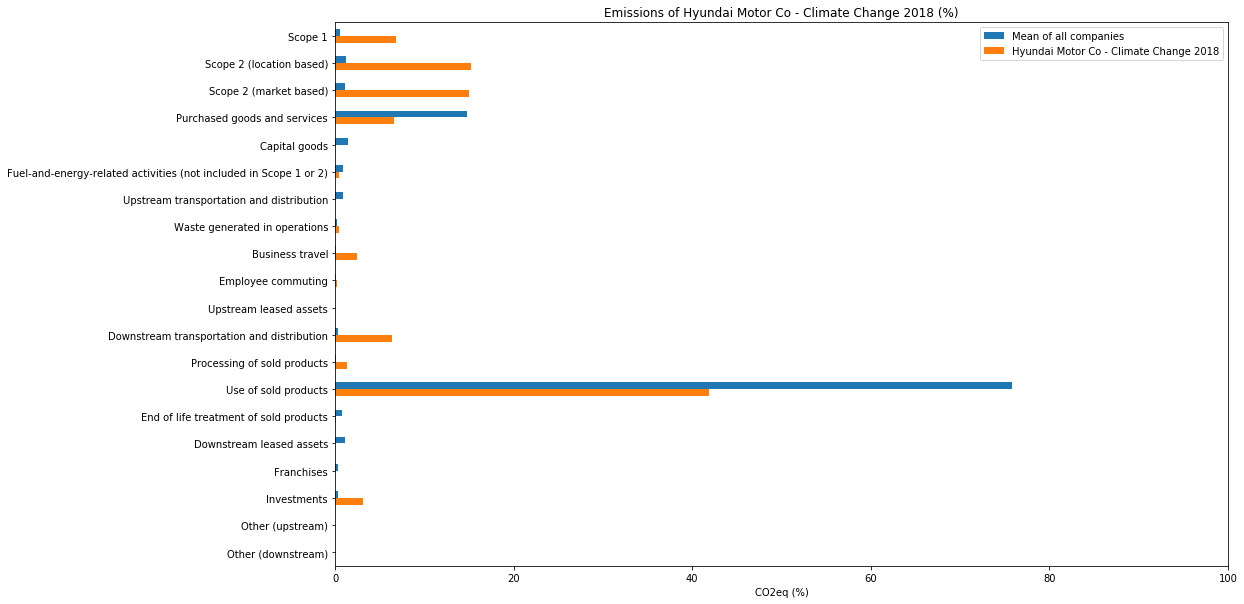

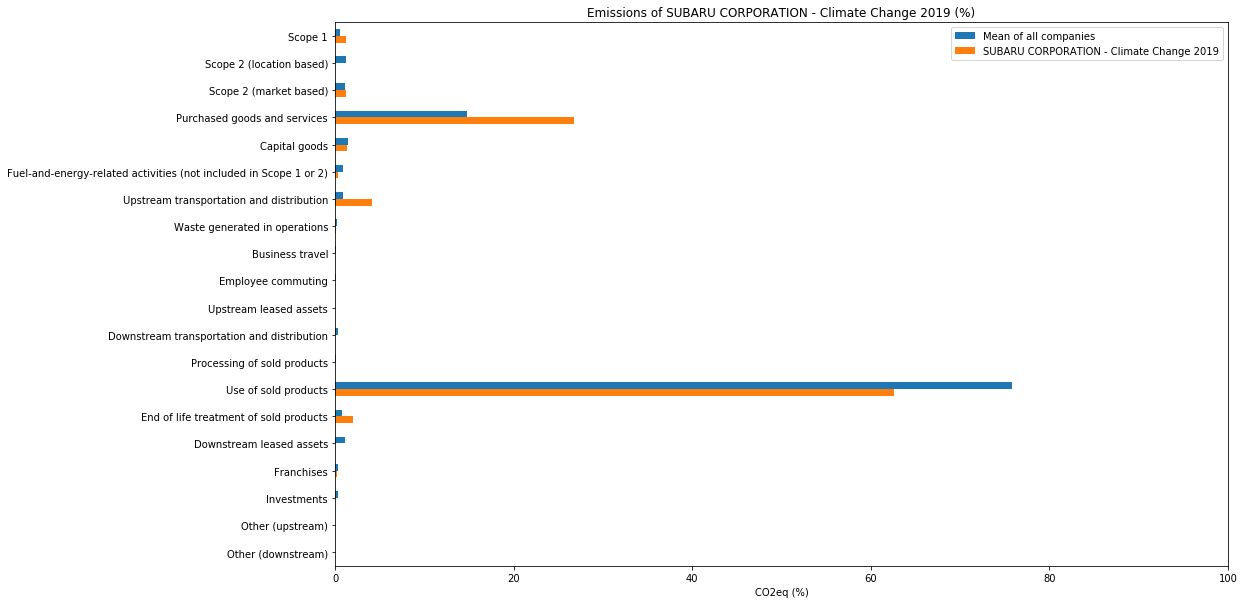

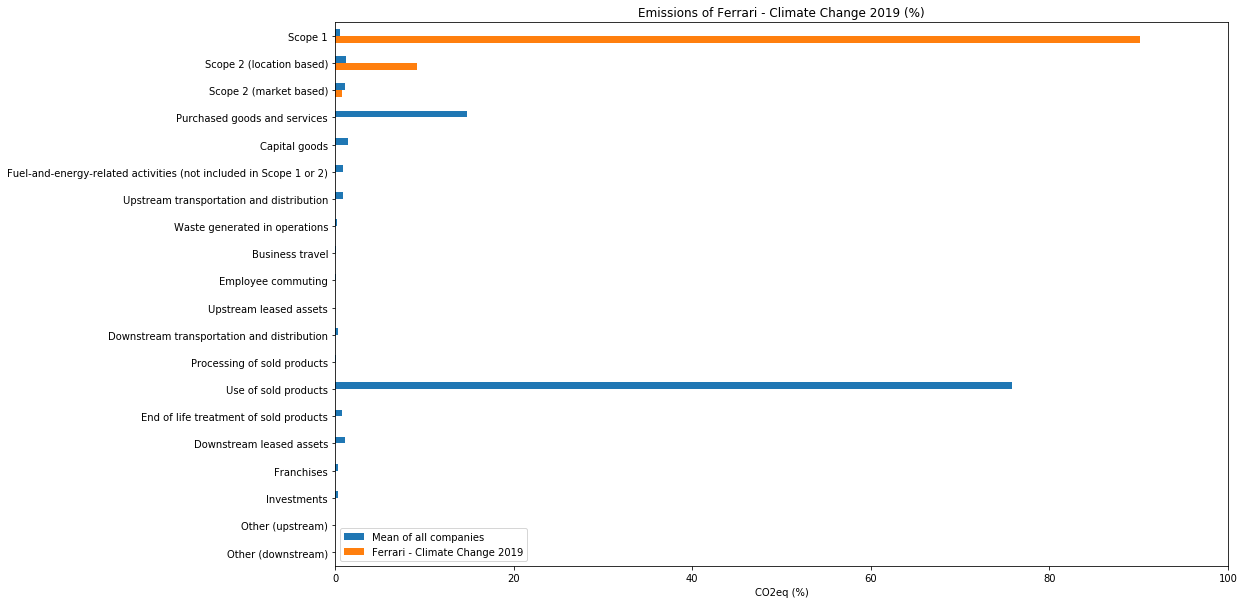

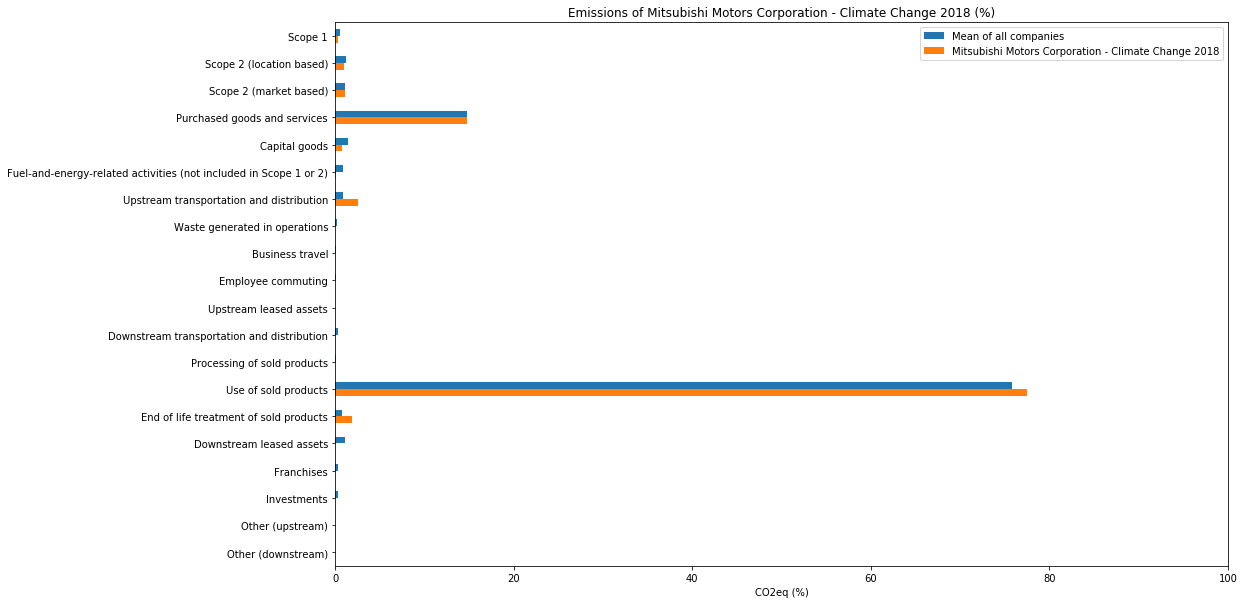

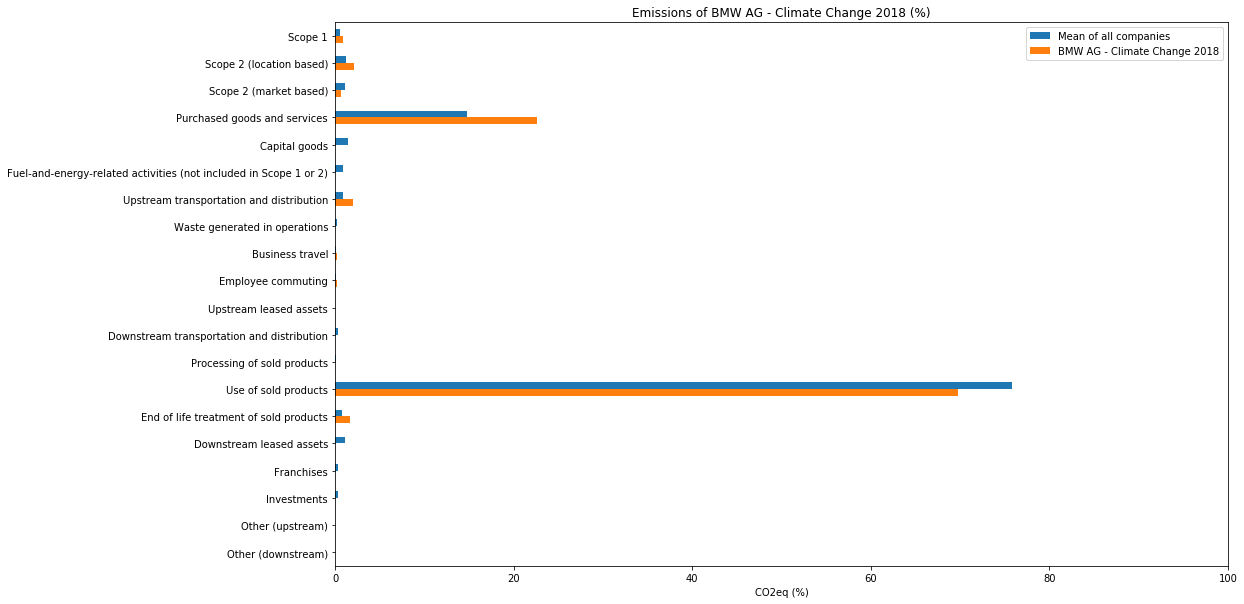

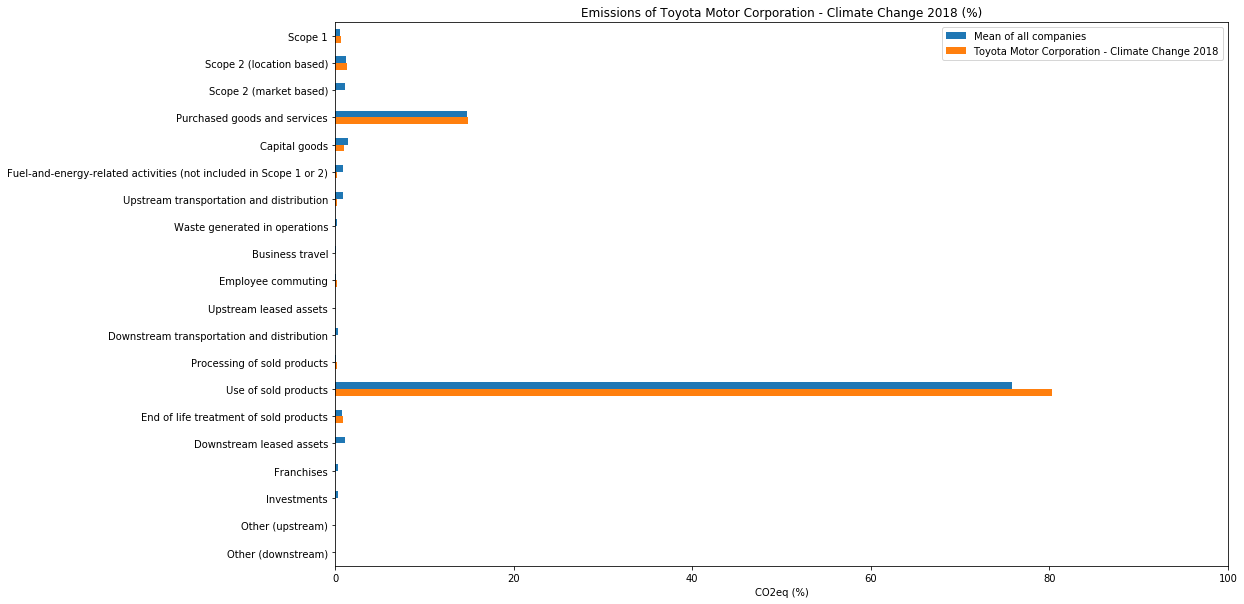

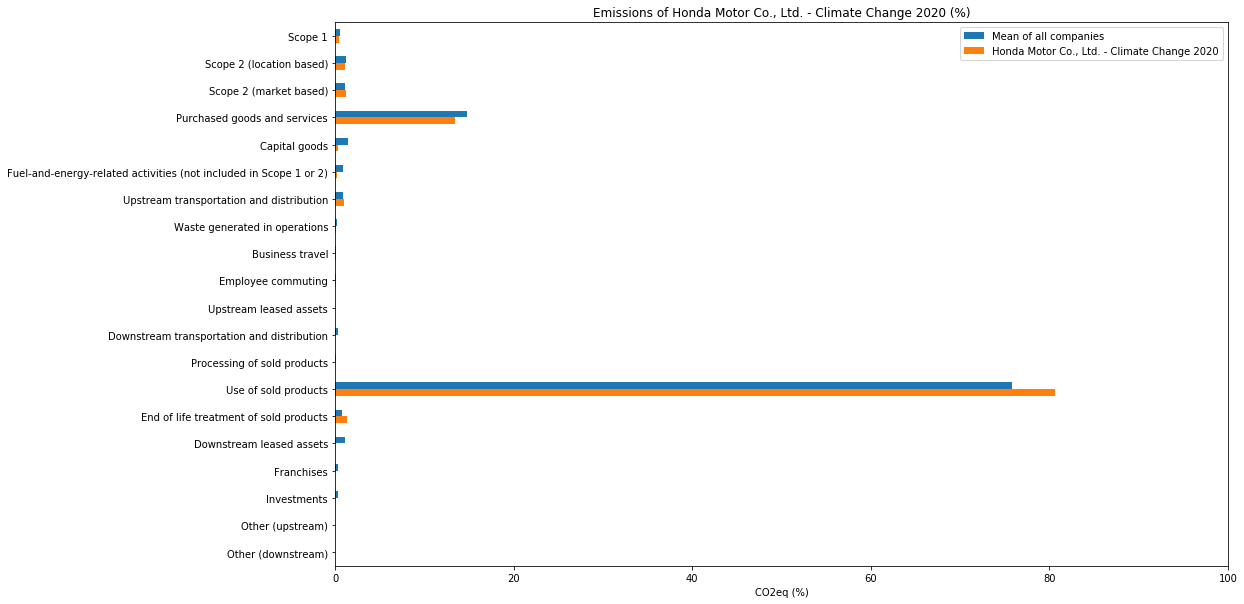

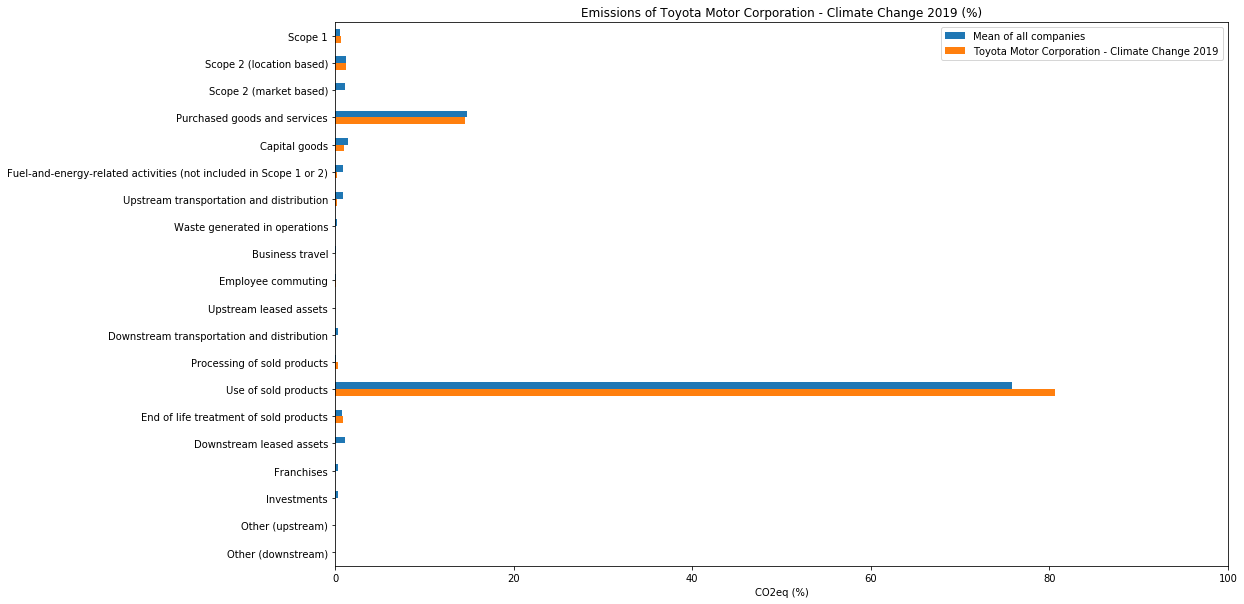

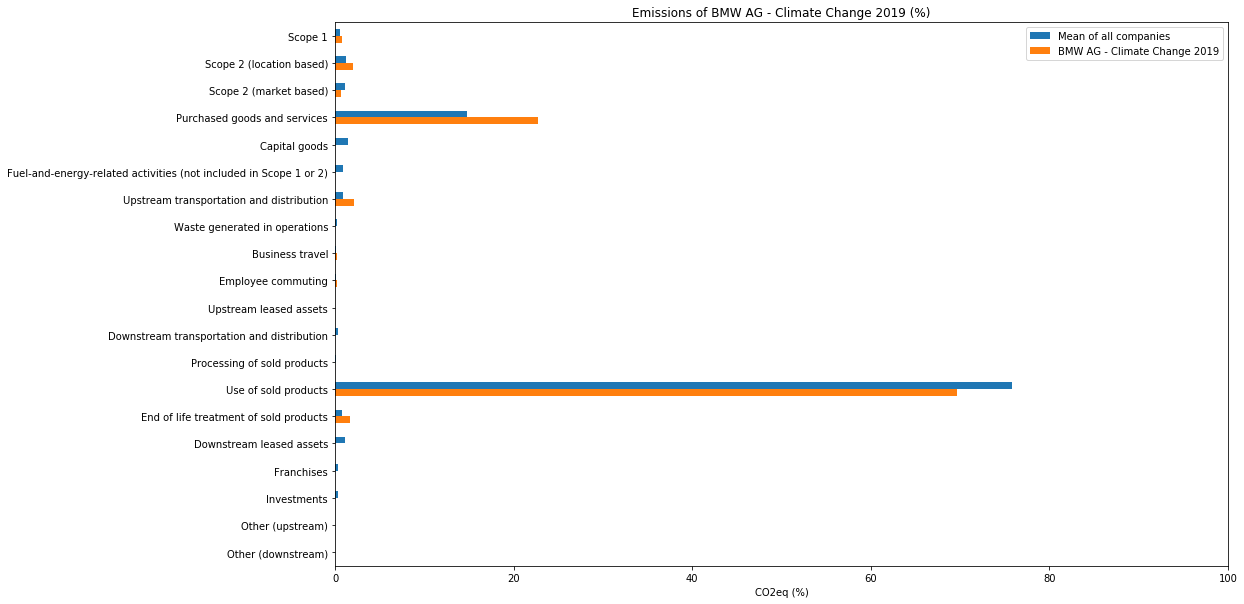

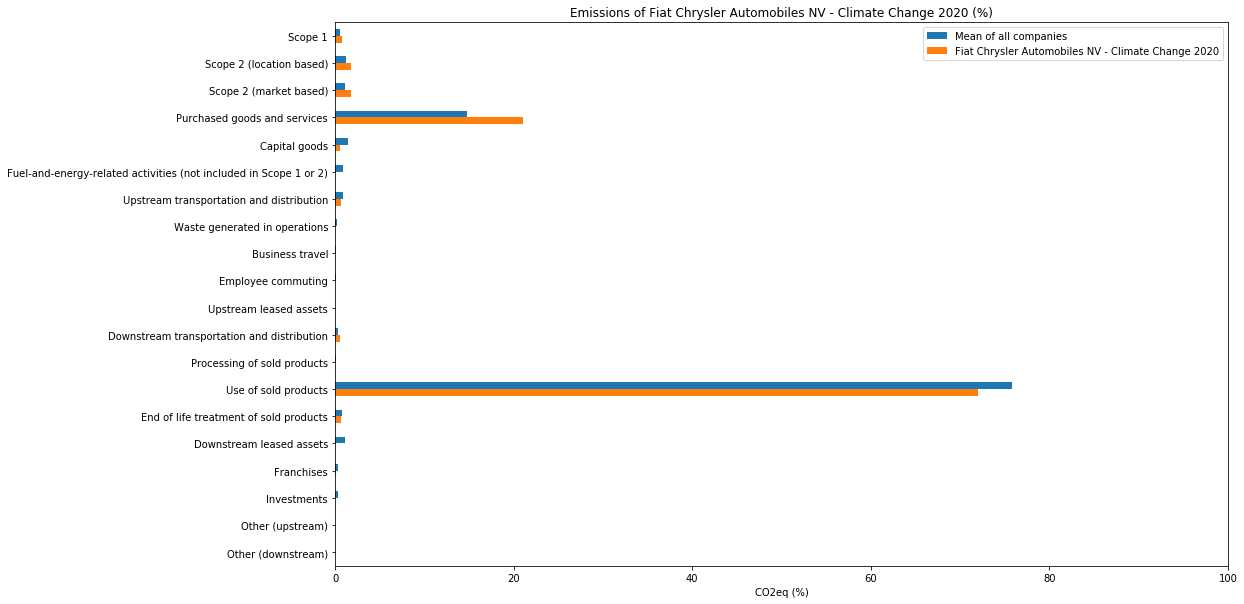

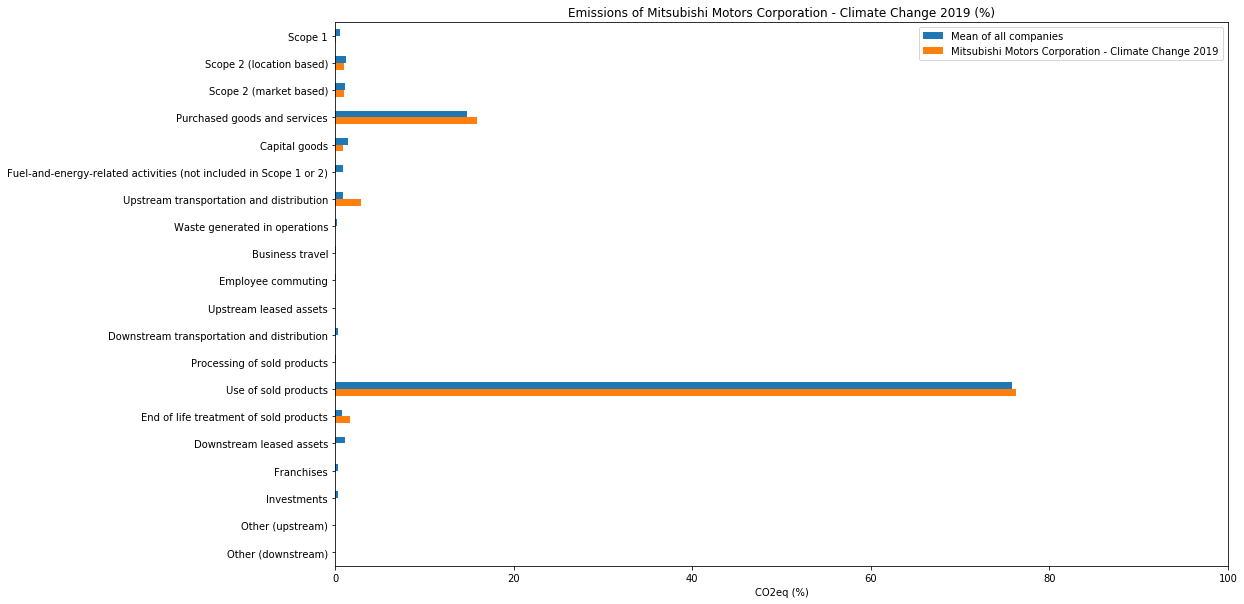

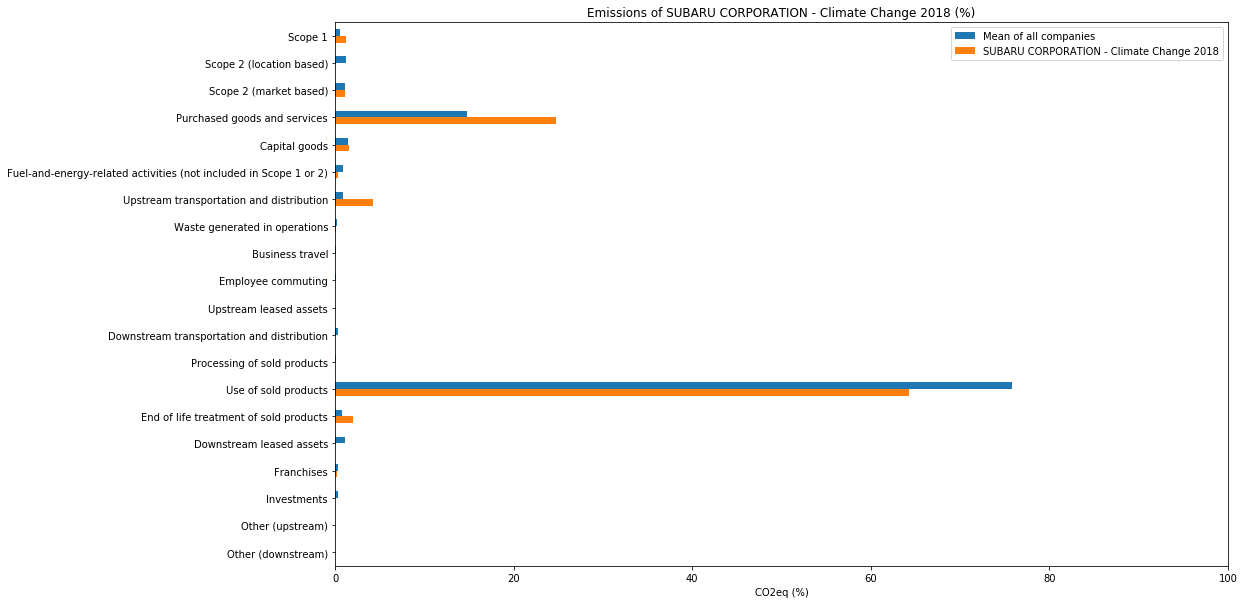

In [20]:
"""
Creating graphics for each company

Each graphic has the total emission of a company and the mean of all other companies for a specific sector 

All graphics are saved in the folder intensity_images
"""
for title in df.Title[:-1]:
    statistics_company(df, title)

In [21]:
def get_no_answer(data, year):
    """
    Function to count the quantity of non answer of each sector for each year. 
    
    "data" must be the database from Automotive_CDP.csv
    "year" contains the year, i.e. "Climate Change 2020'    
    """

    data[['Company', 'Report year']] = data['Title'].str.split('-', n=1, expand=True)
    data['Company'] = data['Company'].str.strip() 
    data['Report year'] = data['Report year'].str.strip()

    year_data = data.loc[data['Report year'] == year]
    
    #selecting between Scope 1 (index=6 and Other(downstream))
    year_data = year_data.iloc[:,6:-2]
    #Replacing Not Applicable by np.nan
    year_data = year_data.replace('<Not Applicable>', np.nan)
    #Total of reports in "year"
    total_reports = year_data.shape[0]

    nan_answer = []
    for column in year_data:
        arr = np.array(year_data[column], dtype=float)
        nan_answer.append(arr[np.isnan(arr)].shape[0])

    nan_answer = 100 * np.array(nan_answer) / total_reports
    year_data.loc['Non Answer'] = nan_answer


    #Ploting
    y_pos = np.arange(year_data.shape[1])

    fig, ax = plt.subplots(figsize=(20,12))
    ax.barh(y_pos, nan_answer[nan_answer.argsort()])
    ax.set_yticks(y_pos)
    ax.set_yticklabels(np.array(name)[nan_answer.argsort()])
    ax.set_xlim(0,100)
    ax.set_xlabel('%')
    ax.set_title(year + ': (%) of non answer')

    path = 'no_answer_' + year + '.png'
    fig.savefig("no_answers_images/" + path, bbox_inches='tight')

    #Returning data_frame if it's necessary
    year_data.insert(loc=0, column='Title', value=data.Title)
    return year_data


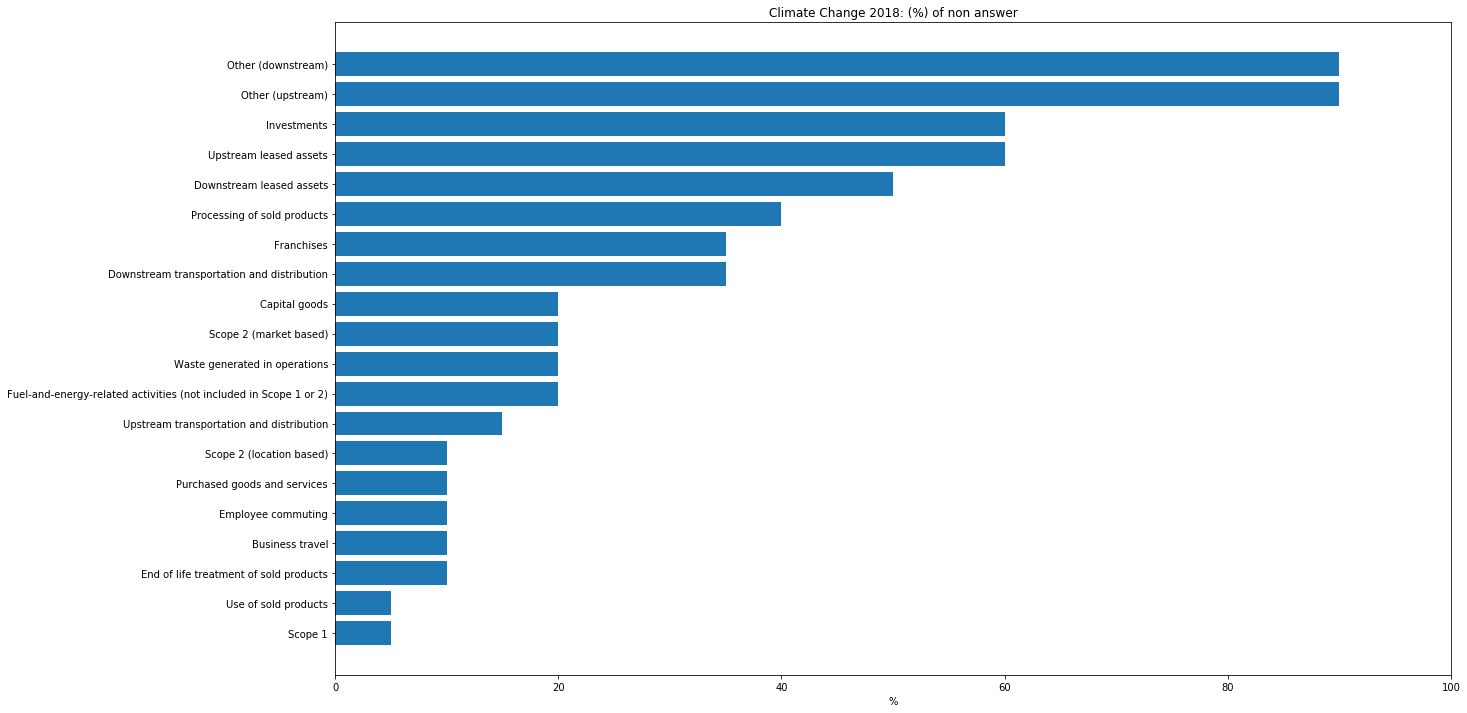

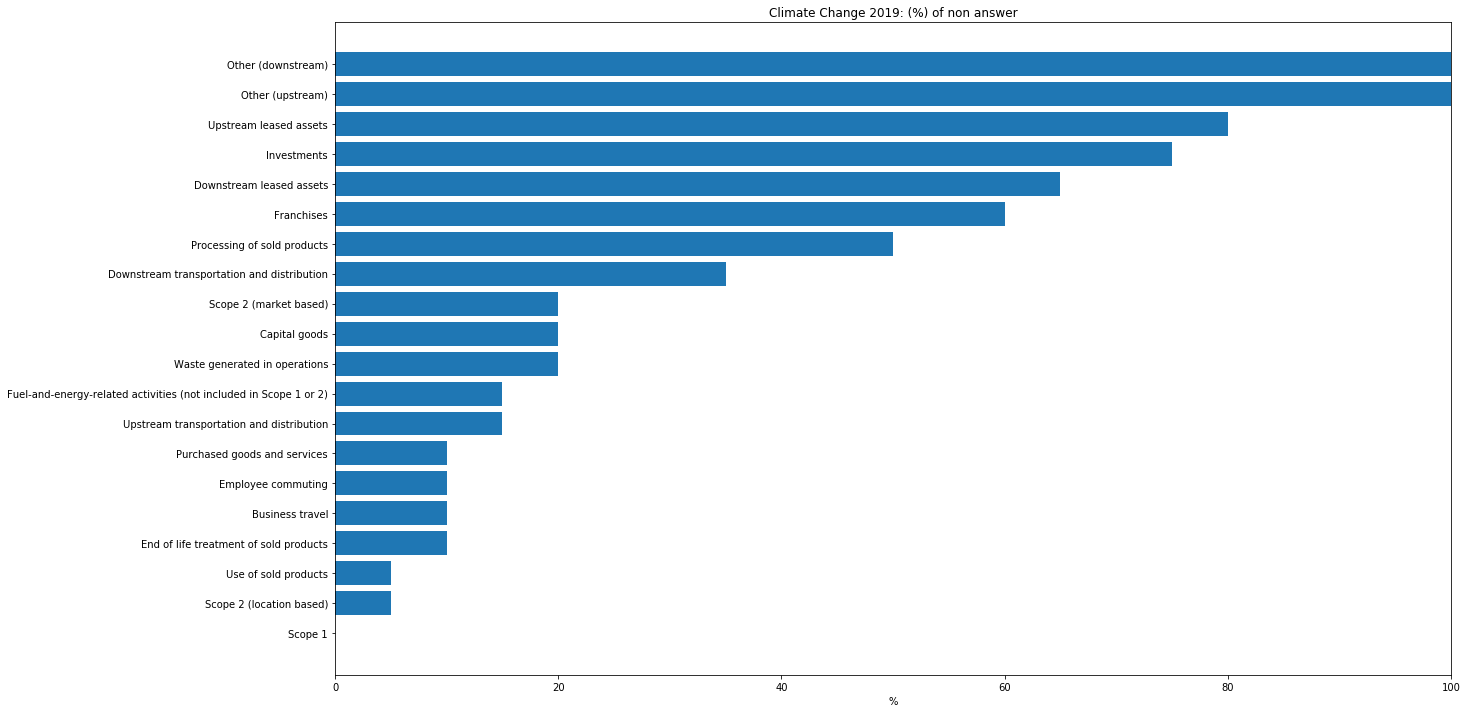

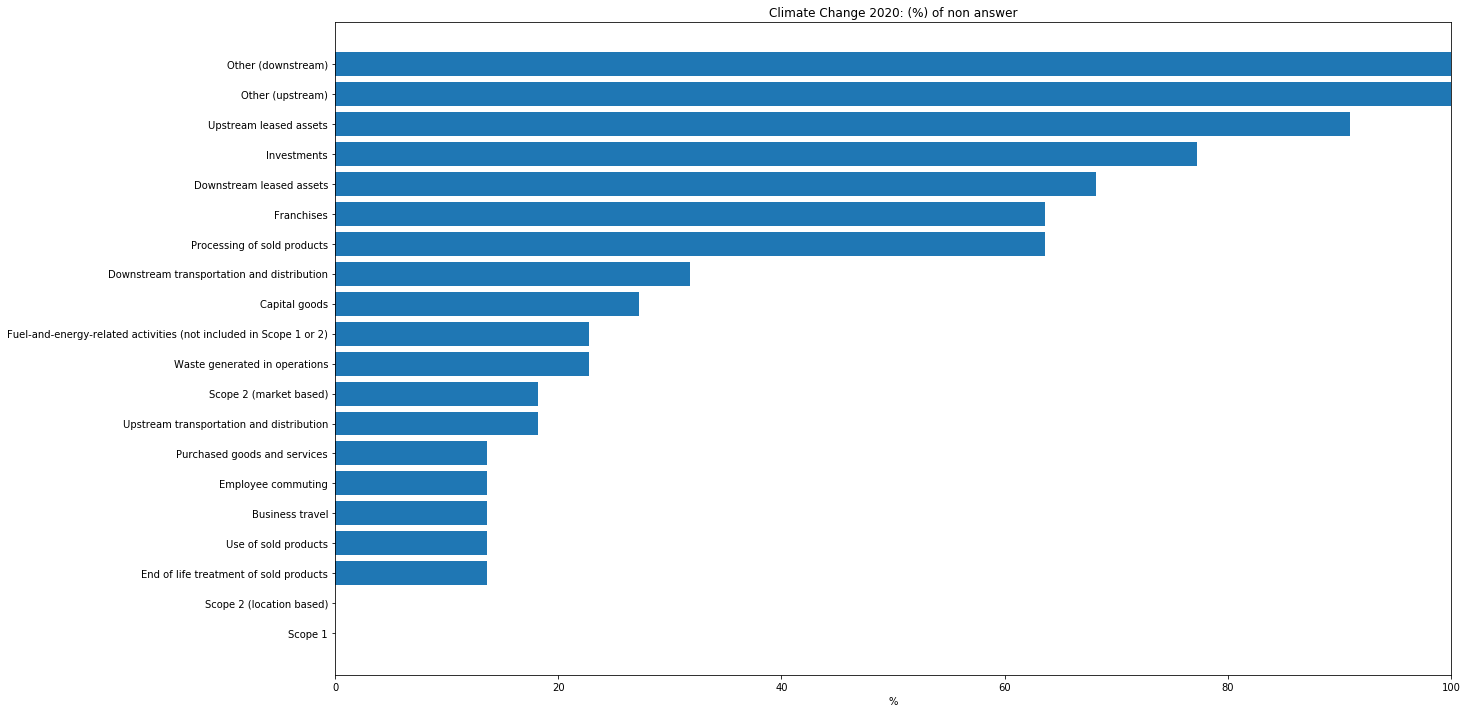

In [22]:
path = 'CSV_files/First_Analysis_no_answer_'
year_data = get_no_answer(data, 'Climate Change 2018')
year_data.to_csv(path + '2018.csv')
year_data = get_no_answer(data, 'Climate Change 2019')
year_data.to_csv(path + '2019.csv')
year_data = get_no_answer(data, 'Climate Change 2020')
year_data.to_csv(path + '2020.csv')

## Intensity 1 (gCO2e / km)

For this first analysis, we normalize the use of sold product by the _number of cars sold_, _lifetime_ and _annual distance in km_

$$
Use~of~sold~product~(normalized) = \frac{Use~of~sold~product~(CDP)}{sales * lifetime * distance~km}
$$

For this analysis, the dataframe used is "Automotive_use_sold_product_CDP.csv".

In [23]:
USP = pd.read_csv('CSV_files/Automotive_use_sold_product_CDP.csv')
print(USP.shape)

(72, 12)


Dropping out the companies that didn't answer (nan or zero).

In [24]:
#Nan answers
label = "Metric numerator (Scope 3 emissions: use of sold products) in Metric tons CO2e"
condition = USP[label].isna() 

In [25]:
USP[condition]

,Unnamed: 0,Title,Activity,Emissions intensity figure,Metric numerator (Scope 3 emissions: use of sold products) in Metric tons CO2e,Metric denominator,Metric denominator: Unit total,% change from previous year,Vehicle unit sales in reporting year,Vehicle lifetime in years,Annual distance in km or miles (unit specified by column 4),Load factor
12,12,BYD - Climate Change 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,27,Navistar International Corporation - Climate C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,34,BYD - Climate Change 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,37,Navistar International Corporation - Climate C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,55,Navistar International Corporation - Climate C...,Heavy Duty Vehicles (HDV),NaN,NaN,Please select,NaN,NaN,NaN,NaN,NaN,"Please explain the changes, and relevant stand..."
60,60,Ferrari - Climate Change 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#no answers

USP[USP[label] == 0]

,Unnamed: 0,Title,Activity,Emissions intensity figure,Metric numerator (Scope 3 emissions: use of sold products) in Metric tons CO2e,Metric denominator,Metric denominator: Unit total,% change from previous year,Vehicle unit sales in reporting year,Vehicle lifetime in years,Annual distance in km or miles (unit specified by column 4),Load factor
11,11,Ferrari - Climate Change 2020,Light Duty Vehicles (LDV),0.0,0.0,p.km,0.0,0.0,10131.0,999.0,0.0,1 driver


In [27]:
USP = USP[~condition]
USP = USP[~(USP[label] == 0)]
#new Use of Sold Products without no and nan answers
USP.shape

(65, 12)

First, converting the distances in _mile_ to _km_ 

In [28]:
label = "Annual distance in km or miles (unit specified by column 4)"
condition_1 = USP["Metric denominator"] == 'p.mile' 
condition_2 = USP["Metric denominator"] == 't.mile'
if any(condition_1) or any(condition_2):
    USP.loc[condition_1 | condition_2, label] *= 1.60934 
    USP.loc[condition_1, "Metric denominator"] = 'p.km'
    USP.loc[condition_2, "Metric denominator"] = 't.km'

Now, all distances are in km (both p.km and t.km); same metric.

It is possible, now, to do the normalization.

In [29]:
#all important labels for this analysis
label1 = "Metric numerator (Scope 3 emissions: use of sold products) in Metric tons CO2e"
label2 = "Vehicle unit sales in reporting year"
label3 = "Vehicle lifetime in years"
label4 = "Annual distance in km or miles (unit specified by column 4)"

In [30]:
#Including a new column with normalized values
USP['gCO2e / km'] = (1e+6 * USP[label1]) / (USP[label2] * USP[label3] * USP[label4])

In [31]:
ranking_I1 = USP.sort_values(by=['gCO2e / km'])[['Title', 'Activity', 
                                'Metric numerator (Scope 3 emissions: use of sold products) in Metric tons CO2e', 'Vehicle unit sales in reporting year',
                                'Vehicle lifetime in years',
                                'Annual distance in km or miles (unit specified by column 4)',
                                'gCO2e / km']]

ranking_I1 = ranking_I1[ranking_I1['Activity'] == 'Light Duty Vehicles (LDV)']
ranking_I1.to_csv('CSV_files/ranking_I1.csv')

In [32]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(ranking_I1)

,Title,Activity,Metric numerator (Scope 3 emissions: use of sold products) in Metric tons CO2e,Vehicle unit sales in reporting year,Vehicle lifetime in years,Annual distance in km or miles (unit specified by column 4),gCO2e / km
18,"Nissan Motor Co., Ltd. - Climate Change 2018",Light Duty Vehicles (LDV),1.902610e+05,5770000.0,17.00,12470.00000,0.155546
59,SUBARU CORPORATION - Climate Change 2019,Light Duty Vehicles (LDV),1.880677e+07,100000000.0,11.00,100000.00000,0.170971
9,SUBARU CORPORATION - Climate Change 2020,Light Duty Vehicles (LDV),3.139064e+07,1033900.0,13.00,205563.00000,11.361438
45,Mahindra &amp; Mahindra - Climate Change 2019,Light Duty Vehicles (LDV),1.369123e+06,314741.0,15.00,10000.00000,28.999993
47,Mahindra &amp; Mahindra - Climate Change 2018,Light Duty Vehicles (LDV),1.196993e+06,271427.0,15.00,10000.00000,29.400000
31,Hyundai Motor Co - Climate Change 2020,Light Duty Vehicles (LDV),4.399090e+06,339260.0,10.00,12000.00000,108.056014
21,Mahindra &amp; Mahindra - Climate Change 2020,Light Duty Vehicles (LDV),3.130598e+06,171189.0,15.00,10000.00000,121.915855
52,Daimler AG - Climate Change 2018,Light Duty Vehicles (LDV),1.687500e+07,900000.0,10.00,15000.00000,125.000000
30,Groupe PSA - Climate Change 2018,Light Duty Vehicles (LDV),6.117471e+07,3228381.0,10.00,15000.00000,126.326905
13,Groupe PSA - Climate Change 2019,Light Duty Vehicles (LDV),7.348931e+07,3877765.0,10.00,15000.00000,126.343068


In [33]:
#Removing outliers
from numpy import percentile

data = np.array(ranking_I1['gCO2e / km'])
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
lower, upper

(94.89876966781662, 215.9762285061047)

In [34]:
ranking_I1[(ranking_I1['gCO2e / km'] > upper) | (lower > ranking_I1['gCO2e / km'])]

,Title,Activity,Metric numerator (Scope 3 emissions: use of sold products) in Metric tons CO2e,Vehicle unit sales in reporting year,Vehicle lifetime in years,Annual distance in km or miles (unit specified by column 4),gCO2e / km
18,"Nissan Motor Co., Ltd. - Climate Change 2018",Light Duty Vehicles (LDV),1.902610e+05,5770000.0,17.0,12470.0,0.155546
59,SUBARU CORPORATION - Climate Change 2019,Light Duty Vehicles (LDV),1.880677e+07,100000000.0,11.0,100000.0,0.170971
9,SUBARU CORPORATION - Climate Change 2020,Light Duty Vehicles (LDV),3.139064e+07,1033900.0,13.0,205563.0,11.361438
45,Mahindra &amp; Mahindra - Climate Change 2019,Light Duty Vehicles (LDV),1.369123e+06,314741.0,15.0,10000.0,28.999993
47,Mahindra &amp; Mahindra - Climate Change 2018,Light Duty Vehicles (LDV),1.196993e+06,271427.0,15.0,10000.0,29.400000
44,Mahindra &amp; Mahindra - Climate Change 2019,Light Duty Vehicles (LDV),8.332539e+06,254351.0,15.0,10000.0,218.400000
48,Mahindra &amp; Mahindra - Climate Change 2018,Light Duty Vehicles (LDV),8.257142e+06,248859.0,15.0,10000.0,221.200000
22,Mahindra &amp; Mahindra - Climate Change 2020,Light Duty Vehicles (LDV),8.395722e+06,250046.0,15.0,10000.0,223.844733
53,Volkswagen AG - Climate Change 2018,Light Duty Vehicles (LDV),2.494666e+08,10574345.0,15.0,10.0,157277.921233


In [35]:
ranking_I1 = ranking_I1[ranking_I1['gCO2e / km'] < upper]
ranking_I1 = ranking_I1[lower < ranking_I1['gCO2e / km']]
ranking_I1

,Title,Activity,Metric numerator (Scope 3 emissions: use of sold products) in Metric tons CO2e,Vehicle unit sales in reporting year,Vehicle lifetime in years,Annual distance in km or miles (unit specified by column 4),gCO2e / km
31,Hyundai Motor Co - Climate Change 2020,Light Duty Vehicles (LDV),4.399090e+06,339260.0,10.00,12000.00000,108.056014
21,Mahindra &amp; Mahindra - Climate Change 2020,Light Duty Vehicles (LDV),3.130598e+06,171189.0,15.00,10000.00000,121.915855
52,Daimler AG - Climate Change 2018,Light Duty Vehicles (LDV),1.687500e+07,900000.0,10.00,15000.00000,125.000000
30,Groupe PSA - Climate Change 2018,Light Duty Vehicles (LDV),6.117471e+07,3228381.0,10.00,15000.00000,126.326905
13,Groupe PSA - Climate Change 2019,Light Duty Vehicles (LDV),7.348931e+07,3877765.0,10.00,15000.00000,126.343068
24,Daimler AG - Climate Change 2020,Light Duty Vehicles (LDV),2.403000e+07,890000.0,10.00,20000.00000,135.000000
71,SUBARU CORPORATION - Climate Change 2018,Light Duty Vehicles (LDV),1.880677e+07,1067000.0,11.00,11818.18000,135.583375
25,Suzuki Motor Corporation - Climate Change 2019,Light Duty Vehicles (LDV),6.677960e+07,3223897.0,15.00,10000.00000,138.092921
3,BMW AG - Climate Change 2020,Light Duty Vehicles (LDV),5.342101e+07,2538367.0,15.00,10000.00000,140.302817
62,BMW AG - Climate Change 2018,Light Duty Vehicles (LDV),5.188771e+07,2460000.0,15.00,10000.00000,140.617095


In [36]:
#The first ranking is then created
ranking_I1.to_csv('CSV_files/Final_ranking_I1.csv')

It is important to note that we clearly have outliers, either at the begging or in the end.

## Intensity 2 (tC02 / cars)

For this second analysis, we want to compare companies with respect to their emissions by number of products sold.

In [37]:
data = pd.read_csv('CSV_files/Automotive_CDP.csv')
USP = pd.read_csv('CSV_files/Automotive_use_sold_product_CDP.csv')
data.shape

(62, 26)

In [38]:
data = data.replace('<Not Applicable>', np.nan)

In [39]:
#Taking out companies that did not answer
cond1 = data["Use of sold products"].isna()
cond2 = data["Purchased goods and services"].isna()
#Not eligible companies
data[cond1 | cond2]

,Unnamed: 0,Title,Start Date,End Date,Currency,Reporting_boundary,Scope 1,Scope 2 (location based),Scope 2 (market based),Purchased goods and services,...,Upstream leased assets,Downstream transportation and distribution,Processing of sold products,Use of sold products,End of life treatment of sold products,Downstream leased assets,Franchises,Investments,Other (upstream),Other (downstream)
10,10,Ferrari - Climate Change 2020,January 1 2019,December 31 2019,EUR,Operational control,93789.00,11603,826,NaN,...,NaN,5482.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,11,BYD - Climate Change 2018,January 1 2017,December 31 2017,ALL,Financial control,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,24,Navistar International Corporation - Climate C...,January 1 2019,December 31 2019,USD,Operational control,91171.00,125729,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,29,BYD - Climate Change 2020,January 1 2019,December 31 2019,CNY,Financial control,131.96,200994.41,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,32,Navistar International Corporation - Climate C...,January 1 2018,December 31 2018,USD,Operational control,88982.00,125015,NaN,NaN,...,NaN,NaN,NaN,50000000.0,NaN,NaN,NaN,NaN,NaN,NaN
47,47,Navistar International Corporation - Climate C...,January 1 2017,December 31 2017,USD,Operational control,77503.00,145869,NaN,NaN,...,NaN,NaN,NaN,50000000.0,NaN,NaN,0.0,NaN,0.0,0.0
52,52,Ferrari - Climate Change 2019,January 1 2018,December 31 2018,EUR,Operational control,91001.00,9219,772,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#Only eligible companies, i.e. set = {use of sold products, purchased goods and services, nb sold cars}
data = data[~(cond1 | cond2)]

In [41]:
print(data.shape)
print(USP.shape)

(55, 26)
(72, 12)


In [42]:
USP_data = USP.merge(data, on=['Title'])

In [43]:
label = "Annual distance in km or miles (unit specified by column 4)"
condition_1 = USP_data["Metric denominator"] == 'p.mile' 
condition_2 = USP_data["Metric denominator"] == 't.mile'
if any(condition_1) or any(condition_2):
    USP_data.loc[condition_1 | condition_2, label] *= 1.60934 
    USP_data.loc[condition_1, "Metric denominator"] = 'p.km'
    USP_data.loc[condition_2, "Metric denominator"] = 't.km'

In [44]:
label1 = "Metric numerator (Scope 3 emissions: use of sold products) in Metric tons CO2e"
label2 = "Vehicle lifetime in years"
label3 = "Annual distance in km or miles (unit specified by column 4)"

USP_data['Use of sold products'] = 150000 * USP_data[label1] / (USP_data[label2] * USP_data[label3])
USP_data = USP_data.rename(columns={"Use of sold products" : "Carbometrix: Use of sold products"})

In [45]:
try:
    USP_data = USP_data.drop('Scope 2 (market based)', axis=1)
except:
    USP_data

In [46]:
USP_data["Carboon footprint"] = USP_data.iloc[:,17:].sum(axis=1)

In [47]:
USP_data["tCO2e / cars"] = USP_data["Carboon footprint"] / USP_data["Vehicle unit sales in reporting year"]

In [48]:
ranking_I2 = USP_data[['Title', 'Activity', 'Metric numerator (Scope 3 emissions: use of sold products) in Metric tons CO2e',
          'Vehicle unit sales in reporting year', 'Vehicle lifetime in years', 'Annual distance in km or miles (unit specified by column 4)', 'Scope 1', 'Scope 2 (location based)', 'Carbometrix: Use of sold products', 'Carboon footprint', 'tCO2e / cars']]

ranking_I2 = ranking_I2.sort_values(by="tCO2e / cars")

In [49]:
ranking_I2 = ranking_I2[ranking_I2['Activity'] == 'Light Duty Vehicles (LDV)']
ranking_I2.to_csv('CSV_files/ranking_I2.csv')

In [50]:
ranking_I2[(ranking_I2['tCO2e / cars'] < 10) | (ranking_I2['tCO2e / cars'] > 100)]

,Title,Activity,Metric numerator (Scope 3 emissions: use of sold products) in Metric tons CO2e,Vehicle unit sales in reporting year,Vehicle lifetime in years,Annual distance in km or miles (unit specified by column 4),Scope 1,Scope 2 (location based),Carbometrix: Use of sold products,Carboon footprint,tCO2e / cars
53,SUBARU CORPORATION - Climate Change 2019,Light Duty Vehicles (LDV),18806767.0,100000000.0,11.0,100000.0,344850.0,NaN,2.564559e+06,1.260074e+07,0.126007
16,"Nissan Motor Co., Ltd. - Climate Change 2018",Light Duty Vehicles (LDV),190261.0,5770000.0,17.0,12470.0,912476.0,2563866,1.346250e+05,2.383210e+07,4.130347
9,SUBARU CORPORATION - Climate Change 2020,Light Duty Vehicles (LDV),31390639.0,1033900.0,13.0,205563.0,279674.2,426247.2,1.761989e+06,5.915727e+06,5.721759
48,Volkswagen AG - Climate Change 2018,Light Duty Vehicles (LDV),249466650.0,10574345.0,15.0,10.0,4297748.0,5901889,2.494666e+11,2.495622e+11,23600.728777


In [51]:
ranking_I2 = ranking_I2[(ranking_I2['tCO2e / cars'] > 10) & (ranking_I2['tCO2e / cars'] < 100)]
ranking_I2

,Title,Activity,Metric numerator (Scope 3 emissions: use of sold products) in Metric tons CO2e,Vehicle unit sales in reporting year,Vehicle lifetime in years,Annual distance in km or miles (unit specified by column 4),Scope 1,Scope 2 (location based),Carbometrix: Use of sold products,Carboon footprint,tCO2e / cars
23,Suzuki Motor Corporation - Climate Change 2019,Light Duty Vehicles (LDV),6.677960e+07,3223897.0,15.00,10000.00000,597347.00,644898,6.677960e+07,7.801207e+07,24.198066
27,Groupe PSA - Climate Change 2018,Light Duty Vehicles (LDV),6.117471e+07,3228381.0,10.00,15000.00000,426737.00,182548,6.117471e+07,8.253505e+07,25.565460
11,Groupe PSA - Climate Change 2019,Light Duty Vehicles (LDV),7.348931e+07,3877765.0,10.00,15000.00000,878013.00,435943,7.348931e+07,9.942487e+07,25.639736
41,"Nissan Motor Co., Ltd. - Climate Change 2020",Light Duty Vehicles (LDV),1.534280e+08,4930000.0,17.00,12470.00000,765370.00,2337703,1.085627e+08,1.290390e+08,26.174247
28,Hyundai Motor Co - Climate Change 2020,Light Duty Vehicles (LDV),4.399090e+06,339260.0,10.00,12000.00000,808139.00,1900954,5.498862e+06,8.925212e+06,26.307880
31,Suzuki Motor Corporation - Climate Change 2020,Light Duty Vehicles (LDV),7.576216e+07,3327174.0,15.00,10000.00000,623000.00,587000,7.576216e+07,8.763416e+07,26.338918
50,Mazda Motor Corporation - Climate Change 2018,Light Duty Vehicles (LDV),3.082011e+07,1017051.0,16.00,13089.00000,135880.00,616360,2.207491e+07,2.736572e+07,26.906930
32,Mazda Motor Corporation - Climate Change 2019,Light Duty Vehicles (LDV),3.185348e+07,1026196.0,16.10,13169.00000,132290.00,584740,2.253562e+07,2.784345e+07,27.132678
18,"Nissan Motor Co., Ltd. - Climate Change 2019",Light Duty Vehicles (LDV),1.808820e+08,5516000.0,17.00,12470.00000,889444.00,2539607,1.279886e+08,1.511030e+08,27.393587
24,Mazda Motor Corporation - Climate Change 2020,Light Duty Vehicles (LDV),3.106838e+07,971149.0,16.06,13336.00000,117120.00,534950,2.175899e+07,2.714510e+07,27.951527


In [52]:
ranking_I2.to_csv('CSV_files/Final_ranking_I2.csv')

## Intensity 3 (tCO2 / M EUR)

In [53]:
intensity_CDP = pd.read_csv('CSV_files/Automotive_intensity_CDP.csv')

In [54]:
intensity_CDP

,Unnamed: 0,Title,Intensity figure,Metric numerator (Gross global combined Scope 1 and 2 emissions),Metric denominator,Metric denominator: Unit total,Scope 2 figure used,% change from previous year,Direction of change,Reason for change
0,0,General Motors Company - Climate Change 2018,0.000042,6151691.00,unit total revenue,1.455880e+11,Market-based,10.40,Decreased,"For the automobile industry, revenue intensity..."
1,1,General Motors Company - Climate Change 2018,0.690000,6151691.00,vehicle produced,8.898697e+06,Market-based,7.00,Decreased,Reduction in vehicle intensity resulted from e...
2,2,Mitsubishi Motors Corporation - Climate Change...,0.235000,533484.00,unit total revenue,2.270276e+12,Market-based,14.00,Increased,"Due to decreased production and sales, operati..."
3,3,Mitsubishi Motors Corporation - Climate Change...,0.463000,533484.00,unit of production,1.152000e+06,Market-based,5.00,Increased,"Due to decreased production and sales, operati..."
4,4,Fiat Chrysler Automobiles NV - Climate Change ...,0.000033,3599405.00,unit total revenue,1.104120e+11,Market-based,5.20,Decreased,"In 2018, FCA revenues were in line with 2017, ..."
...,...,...,...,...,...,...,...,...,...,...
113,113,BMW AG - Climate Change 2019,0.400000,905072.00,vehicle produced,2.248249e+06,Market-based,2.40,Decreased,Increased CO2 efficiency due to emission reduc...
114,114,Fiat Chrysler Automobiles NV - Climate Change ...,0.000032,3417470.00,unit total revenue,1.081870e+11,Market-based,3.10,Decreased,"In 2019, FCA revenues decreased by 2.0% (from ..."
115,115,Mitsubishi Motors Corporation - Climate Change...,0.206000,517735.00,"Other, please specify (Unit total revenue (mil...",2.514594e+06,Market-based,16.00,Decreased,"Due to increased production and sales, operati..."
116,116,Mitsubishi Motors Corporation - Climate Change...,0.439000,517735.00,vehicle produced,1.179075e+06,Market-based,6.00,Decreased,"Due to increased production and sales, operati..."


In [55]:
intensity_CDP = intensity_CDP[~intensity_CDP["Metric denominator"].isna()]

In [56]:
#All types of metrics in the dataframe
set(intensity_CDP["Metric denominator"])

{'Other, please specify (Adjusted sales of non-financial services)',
 'Other, please specify (Ebitda, Mln \\xe2\\x82\\xac)',
 'Other, please specify (Equivalent Tractors produced in Farm Equivalent + Swaraj division)',
 'Other, please specify (Equivalent Vehicles produced in Automotive division)',
 'Other, please specify (Revenue Total (per million))',
 'Other, please specify (Revenue in 100 million yen)',
 'Other, please specify (Total revenue (million JPY))',
 'Other, please specify (Total revenue in million JPY)',
 'Other, please specify (Unit total revenue (million yen))',
 'Other, please specify (\\xe5\\xa3\\xb2\\xe4\\xb8\\x8a\\xe9\\xab\\x98\\xef\\xbc\\x88\\xe5\\x84\\x84\\xe5\\x86\\x86\\xef\\xbc\\x89)',
 'Other, please specify (\\xe5\\xa3\\xb2\\xe4\\xb8\\x8a\\xe9\\xab\\x98\\xef\\xbc\\x88\\xe5\\x84\\x84\\xe5\\x86\\x86\\xef\\xbc\\x89\\xe3\\x80\\x80sales( million JPY ))',
 'Other, please specify (revenue total (per one hundred million))',
 'Other, please specify (total capital (per o

In [57]:
#Removing vehicle produced because we need revenue at this point 

cond1 = intensity_CDP["Metric denominator"] == 'vehicle produced'
cond2 = intensity_CDP["Metric denominator"] == 'square foot'
cond3 = intensity_CDP["Metric denominator"] == 'unit of production'
cond4 = intensity_CDP["Metric denominator"] == 'full time equivalent (FTE) employee'
intensity_CDP = intensity_CDP[~(cond1 | cond2 | cond3 | cond4)]

In [58]:
set(intensity_CDP["Metric denominator"])

{'Other, please specify (Adjusted sales of non-financial services)',
 'Other, please specify (Ebitda, Mln \\xe2\\x82\\xac)',
 'Other, please specify (Equivalent Tractors produced in Farm Equivalent + Swaraj division)',
 'Other, please specify (Equivalent Vehicles produced in Automotive division)',
 'Other, please specify (Revenue Total (per million))',
 'Other, please specify (Revenue in 100 million yen)',
 'Other, please specify (Total revenue (million JPY))',
 'Other, please specify (Total revenue in million JPY)',
 'Other, please specify (Unit total revenue (million yen))',
 'Other, please specify (\\xe5\\xa3\\xb2\\xe4\\xb8\\x8a\\xe9\\xab\\x98\\xef\\xbc\\x88\\xe5\\x84\\x84\\xe5\\x86\\x86\\xef\\xbc\\x89)',
 'Other, please specify (\\xe5\\xa3\\xb2\\xe4\\xb8\\x8a\\xe9\\xab\\x98\\xef\\xbc\\x88\\xe5\\x84\\x84\\xe5\\x86\\x86\\xef\\xbc\\x89\\xe3\\x80\\x80sales( million JPY ))',
 'Other, please specify (revenue total (per one hundred million))',
 'Other, please specify (total capital (per o

In [59]:
label1 = 'Other, please specify (Adjusted sales of non-financial services)'
cond1 = intensity_CDP["Metric denominator"] == label1

label2 = 'Other, please specify (Ebitda, Mln \\xe2\\x82\\xac)'
cond2 = intensity_CDP["Metric denominator"] == label2

label3 = 'Other, please specify (Equivalent Tractors produced in Farm Equivalent + Swaraj division)'
cond3 = intensity_CDP["Metric denominator"] == label3

label4 = 'Other, please specify (Equivalent Vehicles produced in Automotive division)'
cond4 = intensity_CDP["Metric denominator"] == label4

label5 = 'Other, please specify (\\xe5\\xa3\\xb2\\xe4\\xb8\\x8a\\xe9\\xab\\x98\\xef\\xbc\\x88\\xe5\\x84\\x84\\xe5\\x86\\x86\\xef\\xbc\\x89)'
cond5 = intensity_CDP["Metric denominator"] == label5

label6 = 'Other, please specify (\\xe5\\xa3\\xb2\\xe4\\xb8\\x8a\\xe9\\xab\\x98\\xef\\xbc\\x88\\xe5\\x84\\x84\\xe5\\x86\\x86\\xef\\xbc\\x89\\xe3\\x80\\x80sales( million JPY ))'
cond6 = intensity_CDP["Metric denominator"] == label6

intensity_CDP = intensity_CDP[~(cond1 | cond2 | cond3 | cond4 | cond5 | cond6)]

In [60]:
intensity_CDP["Total revenue normalized"] = np.nan

In [61]:
#First, copying 'unit total revenue' to 'Total revenue noramlized' column, since it is already corrected
cond1 = intensity_CDP["Metric denominator"] == 'unit total revenue'
intensity_CDP.loc[cond1, "Total revenue normalized"] = intensity_CDP.loc[cond1, "Metric denominator: Unit total"]

In [62]:
#Now, we need to treat company by company 
cond = intensity_CDP["Total revenue normalized"].isna()
intensity_CDP[cond]

,Unnamed: 0,Title,Intensity figure,Metric numerator (Gross global combined Scope 1 and 2 emissions),Metric denominator,Metric denominator: Unit total,Scope 2 figure used,% change from previous year,Direction of change,Reason for change,Total revenue normalized
26,26,"Nissan Motor Co., Ltd. - Climate Change 2018",0.250000,3306584.0,"Other, please specify (Total revenue (million ...",1.331500e+07,Market-based,10.90,Decreased,Net revenue increased 3.7% compared to FY16 wi...,NaN
29,29,"Nissan Motor Co., Ltd. - Climate Change 2019",0.250000,3229327.0,"Other, please specify (Total revenue in millio...",1.296870e+07,Market-based,1.00,Decreased,The intensity figure unit is t-CO2/million JPY...,NaN
44,44,Mazda Motor Corporation - Climate Change 2020,0.190000,652070.0,"Other, please specify (Revenue in 100 million ...",3.430285e+06,Location-based,99.41,Decreased,As Mazda group makes various effort to reduce ...,NaN
51,51,Hyundai Motor Co - Climate Change 2020,0.026000,2709093.0,"Other, please specify (Revenue Total (per mill...",1.057464e+08,Location-based,11.80,Decreased,Reason for change: As Hyundai Motor Company is...,NaN
52,52,Hyundai Motor Co - Climate Change 2019,0.015230,2751306.0,"Other, please specify (total capital (per one ...",1.806558e+08,Location-based,0.17,Decreased,The company performed reduction activities act...,NaN
56,56,Mazda Motor Corporation - Climate Change 2019,0.201000,717030.0,"Other, please specify (Revenue in 100 million ...",3.564696e+06,Location-based,98.40,Decreased,As Mazda group makes various effort to reduce ...,NaN
94,94,Mazda Motor Corporation - Climate Change 2018,0.217000,752240.0,"Other, please specify (Revenue in 100 million ...",3.474024e+06,Location-based,104.50,Increased,"As the production volume increased, GHG emissi...",NaN
98,98,Hyundai Motor Co - Climate Change 2018,2.701000,2602842.0,"Other, please specify (revenue total (per one ...",9.637608e+05,Location-based,5.23,Decreased,Through operating enterprise-wide GHG response...,NaN
103,103,Mitsubishi Motors Corporation - Climate Change...,0.246000,539919.0,"Other, please specify (Unit total revenue (mil...",2.192389e+06,Market-based,14.00,Decreased,"Due to increased production and sales, operati...",NaN
106,106,Toyota Motor Corporation - Climate Change 2018,0.285177,7870080.0,"Other, please specify (unit total revenue/ mil...",2.759719e+07,Location-based,0.19,Decreased,"Sales increase is a factor, but Toyota impleme...",NaN


In [63]:
cond1 = intensity_CDP.Title == 'Nissan Motor Co., Ltd. - Climate Change 2018'
intensity_CDP.loc[cond1, "Total revenue normalized"] = 1e+6 * intensity_CDP.loc[cond1, "Metric denominator: Unit total"]

cond2 = intensity_CDP.Title == 'Nissan Motor Co., Ltd. - Climate Change 2019'
intensity_CDP.loc[cond2, "Total revenue normalized"] = 1e+6 * intensity_CDP.loc[cond2, "Metric denominator: Unit total"]

cond3 = intensity_CDP.Title == 'Mazda Motor Corporation - Climate Change 2020'
intensity_CDP.loc[cond3, "Total revenue normalized"] = 1e+8 * intensity_CDP.loc[cond3, "Metric denominator: Unit total"]

cond4 = intensity_CDP.Title == 'Hyundai Motor Co - Climate Change 2020'
intensity_CDP.loc[cond4, "Total revenue normalized"] = 1e+6 * intensity_CDP.loc[cond4, "Metric denominator: Unit total"]

cond5 = intensity_CDP.Title == 'Hyundai Motor Co - Climate Change 2019'
intensity_CDP.loc[cond5, "Total revenue normalized"] = 1e+8 * intensity_CDP.loc[cond5, "Metric denominator: Unit total"]

cond6 = intensity_CDP.Title == 'Mazda Motor Corporation - Climate Change 2019'
intensity_CDP.loc[cond6, "Total revenue normalized"] = 1e+8 * intensity_CDP.loc[cond6, "Metric denominator: Unit total"]

cond7 = intensity_CDP.Title == 'Mazda Motor Corporation - Climate Change 2018'
intensity_CDP.loc[cond7, "Total revenue normalized"] = 1e+8 * intensity_CDP.loc[cond7, "Metric denominator: Unit total"]

cond8 = intensity_CDP.Title == 'Hyundai Motor Co - Climate Change 2018'
intensity_CDP.loc[cond8, "Total revenue normalized"] = 1e+8 * intensity_CDP.loc[cond8, "Metric denominator: Unit total"]

cond9 = intensity_CDP.Title == 'Mitsubishi Motors Corporation - Climate Change 2018'
intensity_CDP.loc[cond9, "Total revenue normalized"] = 1e+6 * intensity_CDP.loc[cond9, "Metric denominator: Unit total"]

cond10 = intensity_CDP.Title == 'Toyota Motor Corporation - Climate Change 2018'
intensity_CDP.loc[cond10, "Total revenue normalized"] = 1e+6 * intensity_CDP.loc[cond10, "Metric denominator: Unit total"]

cond11 = intensity_CDP.Title == 'Mitsubishi Motors Corporation - Climate Change 2019'
intensity_CDP.loc[cond11, "Total revenue normalized"] = 1e+6 * intensity_CDP.loc[cond11, "Metric denominator: Unit total"]


##################
#intensity_CDP[intensity_CDP["Total revenue normalized"].isna() | cond1 | cond2 | cond3 | cond4 | cond5 | cond6 | cond7 | cond8 | cond9 | cond10 | cond11] 

In [64]:
intensity_CDP[['Title', 'Total revenue normalized']]

,Title,Total revenue normalized
0,General Motors Company - Climate Change 2018,1.455880e+11
2,Mitsubishi Motors Corporation - Climate Change...,2.270276e+12
4,Fiat Chrysler Automobiles NV - Climate Change ...,1.104120e+11
5,BMW AG - Climate Change 2020,1.042100e+11
8,"Honda Motor Co., Ltd. - Climate Change 2019",1.590000e+13
10,"Honda Motor Co., Ltd. - Climate Change 2018",1.540000e+07
12,Fiat Chrysler Automobiles NV - Climate Change ...,1.109340e+11
13,SUBARU CORPORATION - Climate Change 2020,3.344100e+04
15,General Motors Company - Climate Change 2019,1.470490e+11
16,Ferrari - Climate Change 2020,3.767000e+09


In [65]:
print(intensity_CDP.shape)
print(USP_data.shape)

(58, 11)
(65, 38)


In [66]:
intensity_data = USP_data.merge(intensity_CDP[['Title', 'Total revenue normalized']], on=['Title'])

In [67]:
set(intensity_data[['Title', 'Currency', 'Total revenue normalized']]['Currency'])

{'EUR', 'INR', 'JPY', 'KRW', 'USD'}

All currencies: 

### EUR, INR, JPY, KRW, USD

Normalizing all currencies in EUR.

In 1st February 2021:

1 EUR = 88.42 INR

1 EUR = 126.97 JPY

1 EUR = 1355.91 KRW

1 EUR = 1.21 USD




In [68]:
label = 'Total revenue normalized'
intensity_data['Total revenue (million of EUR)'] = np.nan 

In [69]:
cond = intensity_data['Currency'] == 'INR'
intensity_data.loc[cond,'Total revenue (million of EUR)'] = intensity_data.loc[cond, label] / (1e+6 * 88.42)

cond = intensity_data['Currency'] == 'JPY'
intensity_data.loc[cond, 'Total revenue (million of EUR)'] = intensity_data.loc[cond, label] / (1e+6 * 126.97)

cond = intensity_data['Currency'] == 'KRW'
intensity_data.loc[cond, 'Total revenue (million of EUR)'] = intensity_data.loc[cond, label] / (1e+6 * 1355.91)

cond = intensity_data['Currency'] == 'USD'
intensity_data.loc[cond, 'Total revenue (million of EUR)'] = intensity_data.loc[cond, label] / (1e+6 * 1.21)

cond = intensity_data['Currency'] == 'EUR'
intensity_data.loc[cond, 'Total revenue (million of EUR)'] = intensity_data.loc[cond, label] / 1e+6

In [70]:
#intensity_data.columns

In [71]:
#Inserting the new column we need 
intensity_data['tCO2e / M EUR'] = intensity_data['Carboon footprint'] / intensity_data['Total revenue (million of EUR)']

In [72]:
ranking_I3 = intensity_data[['Title', 'Activity', 'Currency', 'Metric numerator (Scope 3 emissions: use of sold products) in Metric tons CO2e',
          'Vehicle unit sales in reporting year', 'Vehicle lifetime in years', 'Annual distance in km or miles (unit specified by column 4)', 'Scope 1', 'Scope 2 (location based)', 'Carbometrix: Use of sold products', 'Carboon footprint', 'Total revenue (million of EUR)', 'tCO2e / M EUR']]

ranking_I3 = ranking_I3.sort_values(by='tCO2e / M EUR')

In [73]:
ranking_I3 = ranking_I3[ranking_I3['Activity'] == 'Light Duty Vehicles (LDV)']
ranking_I3

,Title,Activity,Currency,Metric numerator (Scope 3 emissions: use of sold products) in Metric tons CO2e,Vehicle unit sales in reporting year,Vehicle lifetime in years,Annual distance in km or miles (unit specified by column 4),Scope 1,Scope 2 (location based),Carbometrix: Use of sold products,Carboon footprint,Total revenue (million of EUR),tCO2e / M EUR
24,Hyundai Motor Co - Climate Change 2019,Light Duty Vehicles (LDV),KRW,3.576346e+06,184344.0,10.00,12000.00000,831180.00,1920126,4.470433e+06,7.385158e+06,1.332358e+07,5.542924e-01
25,Hyundai Motor Co - Climate Change 2019,Light Duty Vehicles (LDV),KRW,4.937006e+06,237376.0,10.00,12000.00000,831180.00,1920126,6.171258e+06,9.085984e+06,1.332358e+07,6.819476e-01
27,Mazda Motor Corporation - Climate Change 2019,Light Duty Vehicles (LDV),JPY,3.185348e+07,1026196.0,16.10,13169.00000,132290.00,584740,2.253562e+07,2.784345e+07,2.807510e+06,9.917486e+00
45,Mazda Motor Corporation - Climate Change 2018,Light Duty Vehicles (LDV),JPY,3.082011e+07,1017051.0,16.00,13089.00000,135880.00,616360,2.207491e+07,2.736572e+07,2.736098e+06,1.000173e+01
21,Mazda Motor Corporation - Climate Change 2020,Light Duty Vehicles (LDV),JPY,3.106838e+07,971149.0,16.06,13336.00000,117120.00,534950,2.175899e+07,2.714510e+07,2.701650e+06,1.004760e+01
23,Hyundai Motor Co - Climate Change 2020,Light Duty Vehicles (LDV),KRW,4.399090e+06,339260.0,10.00,12000.00000,808139.00,1900954,5.498862e+06,8.925212e+06,7.798926e+04,1.144415e+02
47,Hyundai Motor Co - Climate Change 2018,Light Duty Vehicles (LDV),KRW,4.937006e+06,237376.0,10.00,12000.00000,805105.00,1797736,6.171258e+06,9.457704e+06,7.107852e+04,1.330599e+02
13,"Nissan Motor Co., Ltd. - Climate Change 2018",Light Duty Vehicles (LDV),JPY,1.902610e+05,5770000.0,17.00,12470.00000,912476.00,2563866,1.346250e+05,2.383210e+07,1.048673e+05,2.272596e+02
42,Daimler AG - Climate Change 2018,Light Duty Vehicles (LDV),EUR,1.687500e+07,900000.0,10.00,15000.00000,1192000.00,2041000,1.687500e+07,4.039780e+07,1.643300e+05,2.458334e+02
19,Daimler AG - Climate Change 2020,Light Duty Vehicles (LDV),EUR,2.403000e+07,890000.0,10.00,20000.00000,1239000.00,1706000,1.802250e+07,4.647030e+07,1.727450e+05,2.690110e+02


In [74]:
#Removing outliers
from numpy import percentile

data = np.array(ranking_I3['tCO2e / M EUR'])
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
lower, upper

(-666.3098465387145, 3939.271570361201)

In [75]:
ranking_I3[(ranking_I3['tCO2e / M EUR'] > upper) | (lower > ranking_I3['tCO2e / M EUR'])]

,Title,Activity,Currency,Metric numerator (Scope 3 emissions: use of sold products) in Metric tons CO2e,Vehicle unit sales in reporting year,Vehicle lifetime in years,Annual distance in km or miles (unit specified by column 4),Scope 1,Scope 2 (location based),Carbometrix: Use of sold products,Carboon footprint,Total revenue (million of EUR),tCO2e / M EUR
43,Volkswagen AG - Climate Change 2018,Light Duty Vehicles (LDV),EUR,249466650.0,10574345.0,15.0,10.0,4297748.0,5901889,2.494666e+11,2.495622e+11,196949.000000,1.267141e+06
11,Ford Motor Company - Climate Change 2020,Light Duty Vehicles (LDV),USD,134759224.0,4661106.0,10.0,15000.0,1451947.0,3195704,1.347592e+08,1.845289e+08,4.422951,4.172076e+07
36,"Nissan Motor Co., Ltd. - Climate Change 2020",Light Duty Vehicles (LDV),JPY,153428000.0,4930000.0,17.0,12470.0,765370.0,2337703,1.085627e+08,1.290390e+08,0.088348,1.460570e+09
5,"Honda Motor Co., Ltd. - Climate Change 2018",Light Duty Vehicles (LDV),JPY,261000000.0,4830000.0,18.0,17600.0,1350000.0,3790000,1.235795e+08,1.779972e+08,0.121288,1.467553e+09
26,Suzuki Motor Corporation - Climate Change 2020,Light Duty Vehicles (LDV),JPY,75762163.0,3327174.0,15.0,10000.0,623000.0,587000,7.576216e+07,8.763416e+07,0.030491,2.874059e+09
7,SUBARU CORPORATION - Climate Change 2020,Light Duty Vehicles (LDV),JPY,31390639.0,1033900.0,13.0,205563.0,279674.2,426247.2,1.761989e+06,5.915727e+06,0.000263,2.246105e+10
48,SUBARU CORPORATION - Climate Change 2019,Light Duty Vehicles (LDV),JPY,18806767.0,100000000.0,11.0,100000.0,344850.0,NaN,2.564559e+06,1.260074e+07,0.000249,5.062223e+10


In [78]:
ranking_I3.to_csv('CSV_files/ranking_I3.csv')
ranking_I3 = ranking_I3[(ranking_I3['tCO2e / M EUR'] < upper) & (lower < ranking_I3['tCO2e / M EUR'])]

In [79]:
ranking_I3.to_csv('CSV_files/Final_ranking_I3.csv')